In [1]:
# IMPORT YOUR LIBRARIES HERE
# Standard Libraries
import pandas as  pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
import warnings

# Sklearn import
from sklearn.model_selection import train_test_split # Splitting the data set
from sklearn.model_selection import KFold, cross_val_score # Cross validation
from sklearn.preprocessing import MinMaxScaler, StandardScaler # Normalization and standard scaler
from sklearn.preprocessing import PolynomialFeatures # Polynomial features
from sklearn.preprocessing import LabelEncoder #1-hot encoding
from sklearn.preprocessing import OneHotEncoder # Label encoding
from sklearn.linear_model import LinearRegression # Regression linear model
from sklearn.linear_model import Lasso # Lasso model
from sklearn.linear_model import Ridge # Ridge model
from sklearn.linear_model import RidgeCV # Ridge with cross validation
from sklearn.linear_model import ElasticNet # ElasticNet model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # Metrics for errors

from sklearn.linear_model import LogisticRegression # Logistic regression model
from sklearn.linear_model import LogisticRegressionCV # Logistic regression with cross-validation
from sklearn.metrics import accuracy_score  # Accuracy
from sklearn.metrics import confusion_matrix # Confusion matrix
from sklearn.metrics import precision_score, recall_score, f1_score  # Precision, recall, and f1 score

from sklearn.neighbors import KNeighborsClassifier # KNN Algorithm
from sklearn.model_selection import GridSearchCV   # Grid search for cross validation
from sklearn.tree import DecisionTreeClassifier, plot_tree # Decision Trees

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support

# Assignment 1 

Welcome to the assignment! 

You will have to implement regression and classification algorithms, applying these methods to the topics of agriculture, food, water, and health. More precisely, you will try to:
- predict crop yields using data on weather and fertilizer use;
- predict the potability of water using data on the mineral and micro-organisms content of water.

Once you are done you have to submit your notebook here: 
[https://moodle.epfl.ch/mod/assign/view.php?id=1244180](https://moodle.epfl.ch/mod/assign/view.php?id=1244180)

If there is need for further clarifications on the questions, after the assignment is released, we will update this file, so make sure you check the git repository for updates.

Good luck!

## Linear regression: predicting crop yields

In 2020, between 720 million and 811 million persons worldwide were suffering from hunger (see [SDG Goal 2](https://www.un.org/sustainabledevelopment/hunger/) Zero Hunger). Given the ongoing growth of the world population, it is imperative to comprehend crop yield at a global level in order to tackle food security issues and mitigate the effects of climate change.

The Agricultural yield depends on weather conditions (rain, temperature, etc) and fertilizers use. Having precise information regarding the historical crop yield is critical for making informed decisions regarding agricultural risk management and future projections.

Some E4S publications on the topic of food:
- [Threats to Nitrogen Fertilizer, Opportunities to Cultivate Sustainable Practices?](https://e4s.center/resources/reports/threats-to-nitrogen-fertilizer-opportunities-to-cultivate-sustainable-practices/)
- [True cost of food as a lever to transform the Swiss food system](https://e4s.center/resources/reports/true-cost-of-food-as-a-lever-to-transform-the-swiss-food-system/)

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Sustainable_Development_Goal_02ZeroHunger.svg/800px-Sustainable_Development_Goal_02ZeroHunger.svg.png' width="200">

We will use data obtained from the [FAO](http://www.fao.org/home/en/) (Food and Agriculture Organization) and [World Data Bank](https://data.worldbank.org/), and gathered in the [Crop Yield Prediction Dataset](https://www.kaggle.com/datasets/patelris/crop-yield-prediction-dataset).

Our goal is to predict the crop yields using the temperature, rain fall, and type of crops.


### Question 1: Load and Discover the dataset

#### Legend

`yields` initial dataframe containing Area, Item (type of crops), Year, Yield, Rainfall, Pesticides and Temperature.

`yields_features` subdataframe containing Yield, Rainfall, Pesticides and Temperature.

- (1.1) Load the data in a dataframe. The url link is provided below. Display the first 10 observations and the types of data **1 point**

In [2]:
url_yield = 'https://raw.githubusercontent.com/michalis0/MGT-502-Data-Science-and-Machine-Learning/main/data/yield_df.csv'
yields= pd.read_csv(url_yield)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Rename the columns to make them easier to manipulate
yields = yields.rename(columns={'hg/ha_yield': 'Yield', 'average_rain_fall_mm_per_year': 'Rain', 'pesticides_tonnes': 'Pesticides', 'avg_temp': 'Temperature'})

# Print the renamed dataframe
yields.head(10)

Area         Item  Year  Yield  Rain  Pesticides  Temperature
0  Albania        Maize  1990  36613  1485       121.0        16.37
1  Albania     Potatoes  1990  66667  1485       121.0        16.37
2  Albania  Rice, paddy  1990  23333  1485       121.0        16.37
3  Albania      Sorghum  1990  12500  1485       121.0        16.37
4  Albania     Soybeans  1990   7000  1485       121.0        16.37
5  Albania        Wheat  1990  30197  1485       121.0        16.37
6  Albania        Maize  1991  29068  1485       121.0        15.36
7  Albania     Potatoes  1991  77818  1485       121.0        15.36
8  Albania  Rice, paddy  1991  28538  1485       121.0        15.36
9  Albania      Sorghum  1991   6667  1485       121.0        15.36

The types of the **Yields** dataframe are the following:

In [4]:
yields.dtypes

Area            object
Item            object
Year             int64
Yield            int64
Rain             int64
Pesticides     float64
Temperature    float64
dtype: object

As we can see, the dataset includes both categorical factors such as the Area and the agricultural Item as well as numerical variables including rain, yields, pesticides, and temperature.

- (1.2) Print the list of countries ('Area') and years available in the dataset **1 point**

We find the following countries in our dataframe:

In [5]:
countries = yields['Area'].unique()
print(countries)

['Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Belarus' 'Belgium'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Canada' 'Central African Republic' 'Chile' 'Colombia' 'Croatia'
 'Denmark' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Eritrea'
 'Estonia' 'Finland' 'France' 'Germany' 'Ghana' 'Greece' 'Guatemala'
 'Guinea' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'India' 'Indonesia' 'Iraq'
 'Ireland' 'Italy' 'Jamaica' 'Japan' 'Kazakhstan' 'Kenya' 'Latvia'
 'Lebanon' 'Lesotho' 'Libya' 'Lithuania' 'Madagascar' 'Malawi' 'Malaysia'
 'Mali' 'Mauritania' 'Mauritius' 'Mexico' 'Montenegro' 'Morocco'
 'Mozambique' 'Namibia' 'Nepal' 'Netherlands' 'New Zealand' 'Nicaragua'
 'Niger' 'Norway' 'Pakistan' 'Papua New Guinea' 'Peru' 'Poland' 'Portugal'
 'Qatar' 'Romania' 'Rwanda' 'Saudi Arabia' 'Senegal' 'Slovenia'
 'South Africa' 'Spain' 'Sri Lanka' 'Sudan' 'Suriname' 'Sweden'
 'Switzerland' 'Tajikistan

We find the following years in our dataframe:

In [6]:
years = yields['Year'].unique()
print(years)

[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2004
 2005 2006 2007 2008 2009 2010 2011 2012 2013]


- (1.3) Print the list of 'Item' in the dataset. You should obtain a list of 10 crops, which are among the most consumed in the world **1 point**

We find the following types of crops in our dataframe:

In [7]:
crops = yields['Item'].unique()
print(crops)

['Maize' 'Potatoes' 'Rice, paddy' 'Sorghum' 'Soybeans' 'Wheat' 'Cassava'
 'Sweet potatoes' 'Plantains and others' 'Yams']


Based on the information presented above, it can be observed that the analysis is not restricted to a particular geographic region, such as Europe. Instead, the analysis encompasses **approximately 100 countries** around the world. Furthermore, our dataframe encompasses a time period extending from **1990 to 2013**. Lastly, the analysis will need to consider **ten distinct types of crops** such as Maize or Potatoes.

- (1.4) Display summary statistics for the columns: 'hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes','avg_temp'. How many observations do we have? **1 point**

*Hint:* You can extract the columns 'hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes','avg_temp' in a new dataframe since we will reuse it in the following questions

In [8]:
# Create a new dataframe with the selected columns
yields_features = yields.loc[:, ['Yield', 'Rain', 'Pesticides', 'Temperature']]

# Summary statistics 
yields_features.describe()

Yield         Rain     Pesticides   Temperature
count   28242.000000  28242.00000   28242.000000  28242.000000
mean    77053.332094   1149.05598   37076.909344     20.542627
std     84956.612897    709.81215   59958.784665      6.312051
min        50.000000     51.00000       0.040000      1.300000
25%     19919.250000    593.00000    1702.000000     16.702500
50%     38295.000000   1083.00000   17529.440000     21.510000
75%    104676.750000   1668.00000   48687.880000     26.000000
max    501412.000000   3240.00000  367778.000000     30.650000

In [9]:
# Number of observations
num_observations = len(yields_features)
print("Number of observations:", num_observations)

Number of observations: 28242


#### Analysis of the table

Upon examining the mean and median (50th percentile) values of each column, it appears that there is **no significant skewness** in the Rain and Temperature columns of the table, as their mean and median values are quite similar. 

However, in the case of the Yield and Pesticides columns, the data appears to be quite **asymmetric**. 

We will analyse these observations later in order to confirm them.

- (1.5) Display a heatmap of the correlation matrix between the columns: 'hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes','avg_temp' **1 point**

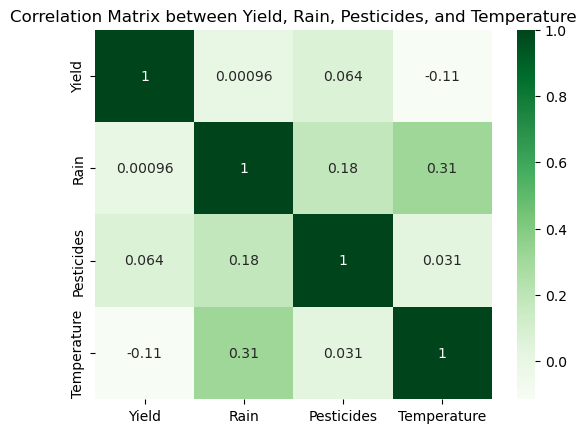

In [10]:
# Create a correlation matrix
corr_matrix = yields_features.corr()

# Set the title and labels for the plot
plt.title("Correlation Matrix between Yield, Rain, Pesticides, and Temperature")
plt.xlabel("Features")
plt.ylabel("Features")

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='Greens')

# Show the plot
plt.show()

In this correlation matrix, various correlations among distinct features are observable. As an instance, the correlation between Temperature and Rain is recorded as 0.31.

- (1.6) Create a boxplot of the columns: 'hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes','avg_temp' **1 point**

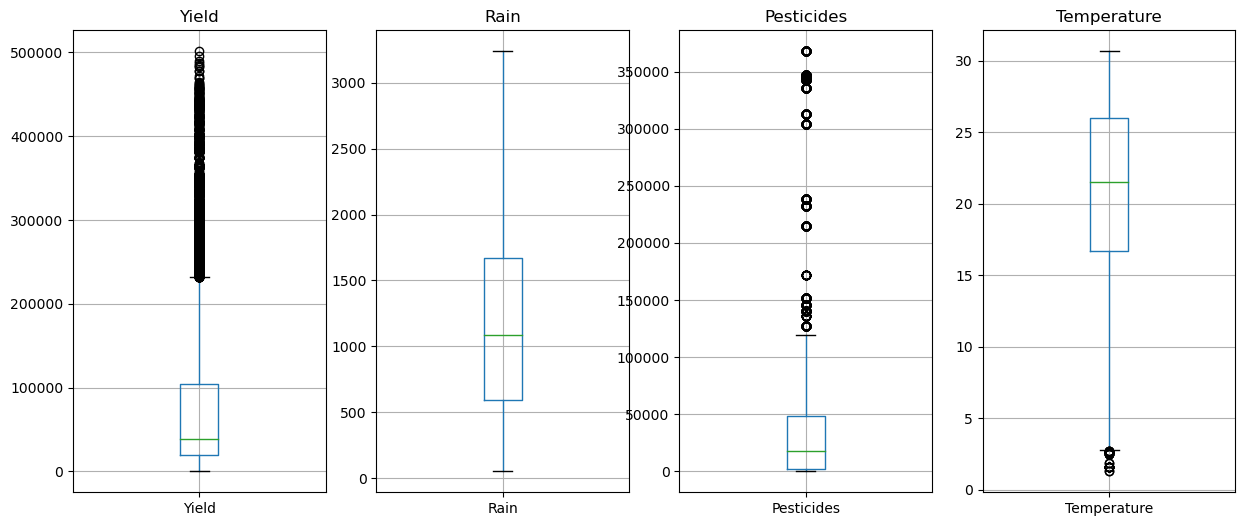

In [11]:
# Create subplots and plot the boxplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 6))
yields_features[['Yield']].boxplot(ax=axes[0])
yields_features[['Rain']].boxplot(ax=axes[1])
yields_features[['Pesticides']].boxplot(ax=axes[2])
yields_features[['Temperature']].boxplot(ax=axes[3])

# Set the titles of the subplots
axes[0].set_title('Yield')
axes[1].set_title('Rain')
axes[2].set_title('Pesticides')
axes[3].set_title('Temperature')

# Display the plots
plt.show()

Regarding **Yield (ha)**, the box plot portrays that the lower values contain the central 50% of data. Nonetheless, the upper part of the plot displays several outliers (represented by black dots). Moreover, the data points exhibit a narrow standard deviation as they are highly concentrated.

In contrast to the hectares data, **Average Rainfall (mm/year)** demonstrates the absence of outliers in the second plot. The box, on the other hand, is relatively larger, indicating that the middle 50% of data points have a wider distribution.

With respect to **Pesticides (tones)**, the plot suggests that a few crops did not receive any pesticides, as the minimum value equals zero. Nevertheless, several outliers are present, exceeding 120k tonnes, which is the maximum value.

Regarding **Average Temperature**, the central 50% of data points indicate that the temperature varied from around 17 to 26 degrees. However, it appears that certain yield values have been affected by cold temperatures (<4ºC).

- (1.7) Create a pairplot of the columns: 'hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes','avg_temp' **1 point**

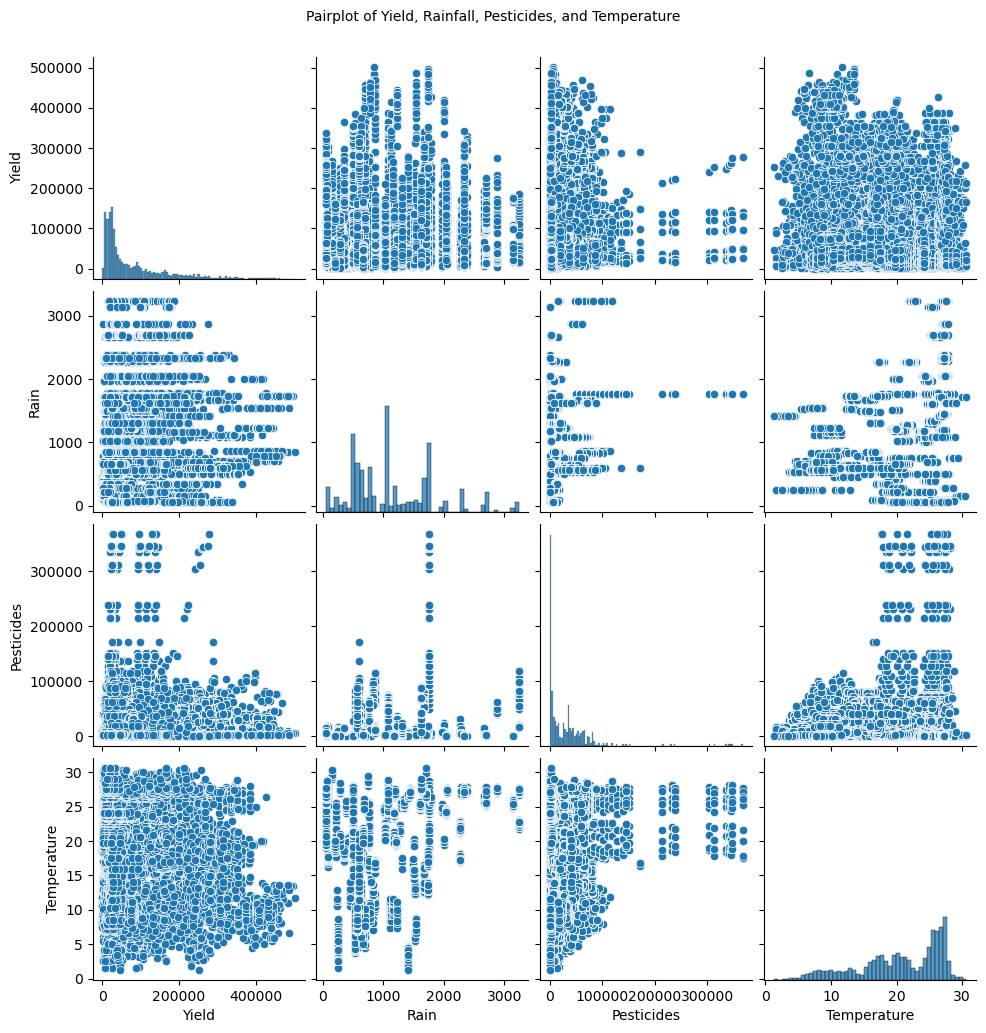

In [12]:
# Create the pairplot
sns.pairplot(yields_features)
plt.suptitle('Pairplot of Yield, Rainfall, Pesticides, and Temperature', fontsize=10, y=1.03)

# Show the plot
plt.show()

- Feel free to pursue your exploration to better understand your dataset. Although not graded, this might help you better understanding the problem and answer the following questions.

In the statistics section, we noted the possibility that our data may be skewed. To investigate this, let's examine the asymmetry:

In [13]:
skewness = yields_features.skew()
print(skewness)

Yield          1.793229
Rain           0.853832
Pesticides     3.490289
Temperature   -0.741582
dtype: float64


We can confirm that all variables display some degree of asymmetry, with no exception to a symmetric distribution.

Now that we have discovered our dataset, let's start our journey!

After loading and cleaning our dataset, we will follow these steps:

- Preprocessing: split our dataset between training set (80% of observations) and test set (20% of observations), scaling, encoding
- Create and fit our model, i.e., learn the parameters using the training set
- Predict new observations and evaluate our model using the test set

Let's start with a Multivariate regression!

### Question 2: Multivariate regression 

We will try to predict the crop yields (column 'hg/ha_yield') using as features: 'Item', 'average_rain_fall_mm_per_year', 'pesticides_tonnes','avg_temp'

- (2.1) Extract your features and outcome **1 point**

####  Legend

`X` features

`y` outcome variable

`X_train` training set features

`y_train` training set target variable

`X_test` test set features

`y_test` test set target variable


In [14]:
# Define my variables
X = yields[['Item', 'Rain', 'Pesticides', 'Temperature']]
y = yields['Yield']

- (2.2) Split between training and test set **1 point**

*Note*: Use as option: `test_size=0.2`, `random_state=42`, `shuffle=True`

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

- (2.3) Encode the column 'Item' using `LabelEncoder` **1 point**

*Note*: After training your encoder, you need to transform the values of both the training and test set

In [16]:
# Extract the column of interest
crop_Item = X_train[['Item']].values.ravel()
crop_Item_test = X_test[['Item']].values.ravel()

#Define the encoder
le = LabelEncoder()

#Fit the encoder
le.fit(crop_Item)

#Transform the train and the test set
X_train = X_train.assign(Item=le.transform(crop_Item))
X_test = X_test.assign(Item=le.transform(crop_Item_test))
print(X_train[['Item']])

       Item
5493      5
10969     6
2001      0
22157     3
311       7
...     ...
21575     4
5390      2
860       3
15795     7
23654     7

[22593 rows x 1 columns]


- (2.4) Rescale your features using `MinMaxScaler` **1 point**

In [17]:
#Define the scaler
scaler = MinMaxScaler()

#Fit the scaler
scaler.fit(X_train)

#Transform the train and the test set
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

- (2.5) Build and train a multivariate linear regression model **1 point**

In [18]:
# 1. Set up the model
model = LinearRegression()

# 2. Use fit
model.fit(X_train, y_train)

# 3. Check the score/accuracy

print("R\u00b2 Score of the model: ", round(model.score(X_train, y_train), 3))

# 4. Print the coefficients of the linear model
print("Intercept: ", model.intercept_)

R² Score of the model:  0.074
Intercept:  139991.29547397234


In [19]:
# 4. Print the coefficients of the linear model 
model_coeff = pd.DataFrame(model.coef_.flatten(), 
                     index=['Item', 'Rain', 'Pesticides', 'Temperature'],
                     columns=['Coefficients multivariate model'])
# Get the coefficients
model_coeff 

Coefficients multivariate model
Item                           -69276.620729
Rain                             7491.197926
Pesticides                      39324.711491
Temperature                    -54159.849248

- (2.6) What is the $R^2$, mean absolute error, and mean square error on the training set? On the test set? What do you think? **1 point**

**Coefficient of determination 𝑅2 score (R-squared)** is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. It ranges from 0 to 1, with higher values indicating a better fit of the regression line to the data.

**Mean Absolute Error (MAE)** is a measure of how close the predictions are to the actual values, without considering their direction. It is calculated as the average of the absolute differences between the predicted and actual values.

**Mean Squared Error (MSE)** is a measure of how close the predictions are to the actual values, taking into account their direction (positive or negative). It is calculated as the average of the squared differences between the predicted and actual values.

These metrics takes the `y_test` values and the `predictions` as arguments. Basically it will analyse how far the prediction is from the true value. Using these metrics is very helpful when comparing the performance of model.

A perfect scenario would be a high **𝑅2 value** (=1) along with low **MSE** and **MAE** values, indicating that the model is able to explain a large proportion of the variance in the data while making accurate predictions. 
However, the specific ideal values for these metrics may depend on the specific problem and context.

In [20]:
# Predict:
predictions = model.predict(X_test)

# Compute the MAE, the MSE and the R^2 on the test set
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Compute the MAE, the MSE and the R^2 on the training set
predictions_train = model.predict(X_train)
mae_train = mean_absolute_error(y_train, predictions_train)
mse_train = mean_squared_error(y_train, predictions_train)
r2_train = r2_score(y_train, predictions_train)

print(f"MAE test set: {mae:0.2f}; MAE training set: {mae_train:0.2f};")
print(f"MSE test set: {mse:0.2f}; MSE training set: {mse_train:0.2f};")
print(f"R\u00b2 test set: {r2:0.2f}; R\u00b2 training set: {r2_train:0.2f};" )

MAE test set: 62446.00; MAE training set: 62188.46;
MSE test set: 6695410825.85; MSE training set: 6672605138.11;
R² test set: 0.08; R² training set: 0.07;


#### Comment on the results:

These results indicate that the model's performance in predicting crop yields using temperature, use of pesticides, rainfall, and crop type **is not very accurate**, as evidenced by the relatively high mean absolute error (MAE) values for both the test and training sets. 

The **MAE** values suggest that the predicted crop yields are, on average, off by around 62,000 to 62,400 units. 

The mean squared error (**MSE**) values also reveal a similar trend, with the predicted crop yields deviating from the actual values by a large margin. The higher the MSE value, the larger the prediction errors. Consequently, it indicates that the model's predictions have a relatively high degree of error.

The **R²** values for both the test and training sets are also quite low, indicating that only a small proportion of the variance in the predicted crop yields can be explained by the independent variables. This implies that the model's predictive power is limited, and there may be other factors beyond temperature, rainfall, and crop type that are influencing crop yields.

For this reason, further improvements to the model may be necessary to achieve more accurate predictions and ultimately contribute to addressing food security and climate change challenges.

### Question 3: Polynomial features regression

We will try to improve the quality of our prediction using `PolynomialFeatures`.

- (3.1) Write a function that is using as inputs the degree of polynomial features (an integer), the training and test set (for your features and outcome), and return the $R^2$, mean absolute error, and mean square error on the training and on the set of a polynomial feature regression **3 points**

*Hint:* You do not need to include in your function the splitting, encoding and scaling since we will reuse the ones set created before (as before). Your function should transform your training and test set to integrate polynomial features, then build and train your model, before calculating the various error metrics.

By introducing **polynomial features**, the model can capture non-linear patterns and interactions between the features, which can improve the accuracy of the predictions. This can lead to a better fit between the predicted values and the actual values of the dependent variable.

The function `PolynomialFeatures` generates a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. 

**Legend**

`polynomial_regression` function of my polynomial regression.

`deg`degree of polynomial features (integer)

In [21]:
def polynomial_regression(deg, X_train, y_train, X_test, y_test):
    
    # Create, fit and transform the polynomial features
    poly = PolynomialFeatures(deg)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)
    
    # Fit linear regression on polynomial features
    lin_reg = LinearRegression()
    lin_reg.fit(X_train_poly, y_train)
    
    # Predict on training and test sets
    y_train_pred = lin_reg.predict(X_train_poly)
    y_test_pred = lin_reg.predict(X_test_poly)
    
    # Performance metrics:
    # Calculate R-squared on training and test sets
    r2_train = r2_score(y_train, y_train_pred) # Train
    r2_test = r2_score(y_test, y_test_pred) # Test

    # Calculate mean absolute error on training and test sets
    mae_train = mean_absolute_error(y_train, y_train_pred) # Train
    mae_test = mean_absolute_error(y_test, y_test_pred) # Test
    
    # Calculate mean squared error on training and test sets
    mse_train = mean_squared_error(y_train, y_train_pred) # Train
    mse_test = mean_squared_error(y_test, y_test_pred) # Test
    
    # Ask to return the results
    return r2_train, r2_test, mae_train, mae_test, mse_train, mse_test

- (3.2) What are the the $R^2$, mean absolute error, and mean square error on the training and on the set of a polynomial features regression with degree = 3? With degree = 7? **1 point**

First, I will compute using our function, the 𝑅2, MAE and MSE using as inputs the **degree of polynomial features = 3**.

In [22]:
# With degree 3 polynomial features
r2_train, r2_test, mae_train, mae_test, mse_train, mse_test = polynomial_regression(3, X_train, y_train, X_test, y_test)

# To display the correct polynomial value when comparing methods, I create 3 varibles.
# They contain the MAE, MSE and R2 of the 3 polynomial feature.
mae3 = mae_test
mse3 = mse_test
r23 = r2_test

# Print the performance metrics results
print("Training R-squared: {:.4f}".format(r2_train))
print("Test R-squared: {:.4f}".format(r2_test))
print("Training MAE: {:.4f}".format(mae_train))
print("Test MAE: {:.4f}".format(mae_test))
print("Training MSE: {:.4f}".format(mse_train))
print("Test MSE: {:.4f}".format(mse_test))

Training R-squared: 0.2162
Test R-squared: 0.2224
Training MAE: 57257.2938
Test MAE: 57230.7691
Training MSE: 5649953904.4943
Test MSE: 5640626612.9725


Now, I will compute using our function, the 𝑅2, MAE and MSE using as inputs the **degree of polynomial features = 7**.

In [23]:
# With degree 7 polynomial features
r2_train, r2_test, mae_train, mae_test, mse_train, mse_test = polynomial_regression(7, X_train, y_train, X_test, y_test)

# Print the performance metrics results
print("Training R-squared: {:.4f}".format(r2_train))
print("Test R-squared: {:.4f}".format(r2_test))
print("Training MAE: {:.4f}".format(mae_train))
print("Test MAE: {:.4f}".format(mae_test))
print("Training MSE: {:.4f}".format(mse_train))
print("Test MSE: {:.4f}".format(mse_test))

Training R-squared: 0.7907
Test R-squared: 0.7857
Training MAE: 28256.7335
Test MAE: 28960.8745
Training MSE: 1508477898.6221
Test MSE: 1554394778.2041


#### Comment on the results:

As we can observe, the first set of results with degree=3 indicates that the model is underfitting, as the R-squared value is very low (0.22), and the MAE and MSE values are high for both the training and test set. 

The second set of results with degree=7 indicates that the model is overfitting as the R-squared value is very high (0.79) for the training set, but the R-squared value for the test set is lower (0.78). The MAE and MSE values are low for the training set and slightly higher for the test set. This suggests that the model may be overfitting to the training data and not generalizing well to new data.

- (3.3) Plot the evolution of the MSE on the training set for a polynomial feature regression model when the degree goes from 2 to 10. On the same figure, plot the MSE on the test set for a polynomial feature regression model, when the degree goes from 2 to 10. Which degree would you choose and why? **2 points**

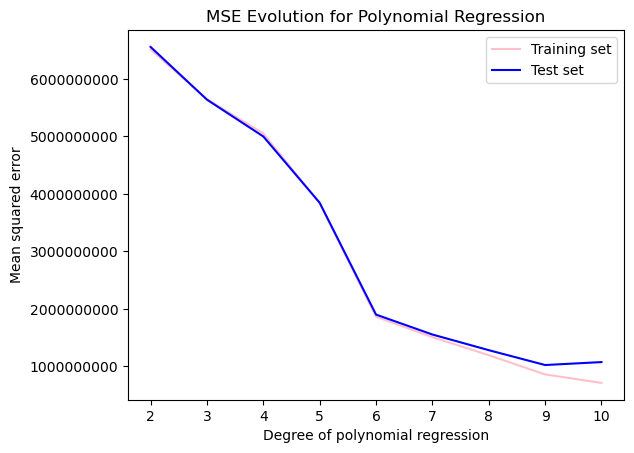

In [24]:
degrees = range(2, 11)
train_mse = []
test_mse = []
for degree in degrees:
    # Create polynomial features and fit the model
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    model = LinearRegression().fit(X_train_poly, y_train)
    
    # Calculate MSE on the training set
    train_pred = model.predict(X_train_poly)
    train_mse.append(mean_squared_error(y_train, train_pred))
    
    # Calculate MSE on the test set
    test_pred = model.predict(X_test_poly)
    test_mse.append(mean_squared_error(y_test, test_pred))

# Plot the MSE evolution for the training set and test set
plt.plot(degrees, train_mse, label='Training set', color='pink' )
plt.plot(degrees, test_mse, label='Test set', color='blue')
plt.xlabel('Degree of polynomial regression')
plt.ylabel('Mean squared error')
plt.legend()
plt.title('MSE Evolution for Polynomial Regression')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

#### Comment on the figure:

Looking at the resulting plot, we want to find the degree where the test set error stops decreasing significantly while the training set error continues to decrease. This will indicate that the model is no longer overfitting to the training set and is generalizing well to the test set. In this instance, the **optimal degree is 9**.

This conclusion is supported by the observation that beyond this degree, the model is inclined to overfit, as evidenced by the increase in the test set error.

Let's then compute the polynomial with degree = 9

In [25]:
# With degree 9 polynomial features
r2_train, r2_test, mae_train, mae_test, mse_train, mse_test = polynomial_regression(9, X_train, y_train, X_test, y_test)

# To display the correct polynomial value when comparing methods at the end of exercise 4, I create 3 varibles.
# They contain the MAE and MSE of the 9 polynomial feature.
mae9 = mae_test
mse9 = mse_test
r29 = r2_test

# Print the performance metrics results
print("Training R-squared: {:.4f}".format(r2_train))
print("Test R-squared: {:.4f}".format(r2_test))
print("Training MAE: {:.4f}".format(mae_train))
print("Test MAE: {:.4f}".format(mae_test))
print("Training MSE: {:.4f}".format(mse_train))
print("Test MSE: {:.4f}".format(mse_test))

Training R-squared: 0.8806
Test R-squared: 0.8589
Training MAE: 18692.5705
Test MAE: 19840.6632
Training MSE: 860581354.7971
Test MSE: 1023542915.1051


In [26]:
# Number of observations
num_observations_poly9 = len(yields_features)
print("Number of observations:", num_observations)

Number of observations: 28242


#### Comment on the results:

We see that the **R-squared** values for both training and test sets are relatively high (>80%), indicating that the model captures a significant proportion of the variance in the target variable. 

The **MAE and MSE** values are also relatively low, which means that the model's predictions are close to the actual values.

However, the test set's MAE and MSE values are slightly higher than the training set, suggesting that the model may be slightly overfitting the training data. 

For this reason, we will continue exploring new ways to improve our Yield predictor.
Let's pursue our exploration with a Ridge regularization!

### Question 4: Ridge and cross-validation

- (4.1) Build, train, and evaluate a polynomial features regression model, with Ridge regularization, and cross validation. For number of degree, select the one that you picked before. How does your new model compares to your previous one? **3 points**

#### Legend

`X_poly_features9` dataframe with the polynomial features of degree= 9.


#### What is the Ridge regularization?

**Ridge regularization** is a technique used in linear regression to prevent overfitting by adding a penalty term to the cost function. The penalty term is proportional to the square of the magnitude of the coefficients, which means it shrinks the coefficients towards zero. This helps to reduce the complexity of the model and avoid overfitting.

###  Ridge without cross validation

In [27]:
# With a degree= 9
poly9 = PolynomialFeatures(9)

# Transform our training and test set
X_train_poly9 = poly9.fit_transform(X_train)
X_test_poly9 = poly9.transform(X_test)

# Feature name:
X_poly_features9 = poly9.get_feature_names(['Item', 'Rain', 'Pesticides', 'Temperature'])
print(X_poly_features9)

['1', 'Item', 'Rain', 'Pesticides', 'Temperature', 'Item^2', 'Item Rain', 'Item Pesticides', 'Item Temperature', 'Rain^2', 'Rain Pesticides', 'Rain Temperature', 'Pesticides^2', 'Pesticides Temperature', 'Temperature^2', 'Item^3', 'Item^2 Rain', 'Item^2 Pesticides', 'Item^2 Temperature', 'Item Rain^2', 'Item Rain Pesticides', 'Item Rain Temperature', 'Item Pesticides^2', 'Item Pesticides Temperature', 'Item Temperature^2', 'Rain^3', 'Rain^2 Pesticides', 'Rain^2 Temperature', 'Rain Pesticides^2', 'Rain Pesticides Temperature', 'Rain Temperature^2', 'Pesticides^3', 'Pesticides^2 Temperature', 'Pesticides Temperature^2', 'Temperature^3', 'Item^4', 'Item^3 Rain', 'Item^3 Pesticides', 'Item^3 Temperature', 'Item^2 Rain^2', 'Item^2 Rain Pesticides', 'Item^2 Rain Temperature', 'Item^2 Pesticides^2', 'Item^2 Pesticides Temperature', 'Item^2 Temperature^2', 'Item Rain^3', 'Item Rain^2 Pesticides', 'Item Rain^2 Temperature', 'Item Rain Pesticides^2', 'Item Rain Pesticides Temperature', 'Item Rai

In [28]:
# Set up the model
ridge_model9 = Ridge(alpha=1, fit_intercept=False)

# Fit
ridge_model9.fit(X_train_poly9, y_train)

# Check the score/accuracy
print("R\u00b2 Score of the model: ", round(ridge_model9.score(X_train_poly9, y_train), 3))

# Print the coefficients of the linear model
model_coeff9 = pd.DataFrame(ridge_model9.coef_.flatten(), 
                     index=X_poly_features9,
                     columns=['Coefficients Ridge model'])
# Get the coefficients
model_coeff9

R² Score of the model:  0.263


Coefficients Ridge model
1                                      -22992.199332
Item                                   627728.744826
Rain                                   370699.068701
Pesticides                             179774.827428
Temperature                             52014.034212
...                                              ...
Pesticides^4 Temperature^5             -22554.149077
Pesticides^3 Temperature^6             -11218.899740
Pesticides^2 Temperature^7             -24477.500347
Pesticides Temperature^8                -3835.443396
Temperature^9                         -140179.834900

[715 rows x 1 columns]

In [29]:
# Predict:
predictions9 = ridge_model9.predict(X_test_poly9)

# Compute the MAE, the MSE and the R^2 on the test set
mae_ridge9 = mean_absolute_error(y_test, predictions9)
mse_ridge9 = mean_squared_error(y_test, predictions9)
r2_ridge9 = r2_score(y_test, predictions9)

# Compute the MAE, the MSE and the R^2 on the training set
predictions_train9 = ridge_model9.predict(X_train_poly9)
mae_train_ridge9 = mean_absolute_error(y_train, predictions_train9)
mse_train_ridge9 = mean_squared_error(y_train, predictions_train9)
r2_train_ridge9 = r2_score(y_train, predictions_train9)

print(f"MAE test set: {mae_ridge9:0.2f}; MAE training set: {mae_train_ridge9:0.2f};")
print(f"MSE test set: {mse_ridge9:0.2f}; MSE training set: {mse_train_ridge9:0.2f};")
print(f"R\u00b2 test set: {r2_ridge9:0.2f}; R\u00b2 training set: {r2_train_ridge9:0.2f};" )

MAE test set: 54950.82; MAE training set: 55267.73;
MSE test set: 5276023508.54; MSE training set: 5315328836.14;
R² test set: 0.27; R² training set: 0.26;


### Ridge with cross validation

#### What is the Ridge regularization with cross validation?

**Ridge regularization with cross-validation** is a method to find the optimal value of the regularization parameter alpha in the Ridge model. It involves dividing the data into k-folds, where k is the number of folds, and training the model k times, each time using a different fold as the validation set and the remaining folds as the training set. This allows for a more accurate estimate of the model's performance and helps to choose the value of alpha that results in the best performance.

We will implement cross validation in addition of our previous polynomial linear regression with ridge regularization.

With the argument `cv`, we can specify the number of folds:

In [30]:
# Set up the model
ridge_cv_model9 = RidgeCV(cv=5, fit_intercept=False)

# Use fit
ridge_cv_model9.fit(X_train_poly9, y_train)

# Check the score/accuracy
print("R\u00b2 Score of the model: ", round(ridge_cv_model9.score(X_train_poly9, y_train), 3))

# Print the coefficients of the linear model
model_coeff9['Coefficients Ridge-CV model']=ridge_cv_model9.coef_.flatten()
model_coeff9

R² Score of the model:  0.356


Coefficients Ridge model  \
1                                      -22992.199332   
Item                                   627728.744826   
Rain                                   370699.068701   
Pesticides                             179774.827428   
Temperature                             52014.034212   
...                                              ...   
Pesticides^4 Temperature^5             -22554.149077   
Pesticides^3 Temperature^6             -11218.899740   
Pesticides^2 Temperature^7             -24477.500347   
Pesticides Temperature^8                -3835.443396   
Temperature^9                         -140179.834900   

                            Coefficients Ridge-CV model  
1                                         -1.698149e+05  
Item                                       1.472921e+06  
Rain                                       6.160289e+05  
Pesticides                                 2.130483e+05  
Temperature                                1.946623e+05  
...                                                 ...  
Pesticides^4 Temperature^5                -1.695193e+04  
Pesticides^3 Temperature^6                 2.975956e+04  
Pesticides^2 Temperature^7                -4.622853e+04  
Pesticides Temperature^8                   1.203370e+05  
Temperature^9                             -1.588158e+05  

[715 rows x 2 columns]

In [31]:
# Predict:
predictions_cv9 = ridge_cv_model9.predict(X_test_poly9)

# Compute the MAE, the MSE and the R^2 on the test set
mae_ridge_cv9 = mean_absolute_error(y_test, predictions_cv9)
mse_ridge_cv9 = mean_squared_error(y_test, predictions_cv9)
r2_ridge_cv9 = r2_score(y_test, predictions_cv9)

# Compute the MAE, the MSE and the R^2 on the training set
predictions_train_cv9 = ridge_cv_model9.predict(X_train_poly9)
mae_train_ridge_cv9 = mean_absolute_error(y_train, predictions_train_cv9)
mse_train_ridge_cv9 = mean_squared_error(y_train, predictions_train_cv9)
r2_train_ridge_cv9 = r2_score(y_train, predictions_train_cv9)

print(f"MAE test set: {mae_ridge_cv9:0.2f}; MAE training set: {mae_train_ridge_cv9:0.2f};")
print(f"MSE test set: {mse_ridge_cv9:0.2f}; MSE training set: {mse_train_ridge_cv9:0.2f};")
print(f"R\u00b2 test set: {r2_ridge_cv9:0.2f}; R\u00b2 training set: {r2_train_ridge_cv9:0.2f};" )

MAE test set: 51107.33; MAE training set: 51595.85;
MSE test set: 4590911679.46; MSE training set: 4639559779.43;
R² test set: 0.37; R² training set: 0.36;


In [32]:
model_comparison = pd.DataFrame([mae9, mse9, r29], index=['MAE', 'MSE', 'R2'], columns=['Polynomial model'])
model_comparison['Ridge model']=[mae_ridge9, mse_ridge9, r2_ridge9]
model_comparison['Ridge with CV']=[mae_ridge_cv9, mse_ridge_cv9,r2_ridge_cv9]
model_comparison

Polynomial model   Ridge model  Ridge with CV
MAE      1.984066e+04  5.495082e+04   5.110733e+04
MSE      1.023543e+09  5.276024e+09   4.590912e+09
R2       8.588931e-01  2.726410e-01   3.670914e-01

#### Comment on the results:

It is important to highlight that all three methods were performed using a degree of 9.

The results show that the **polynomial model** outperforms both Ridge models in terms of MAE and MSE, with the lowest values for both metrics. 

However, the R2 score for the polynomial model is lower than the R2 scores for the Ridge models, indicating that the Ridge models may be better at explaining the variance in the data.

The **Ridge model with cross-validation** performs better than the regular Ridge model in terms of all three metrics, with lower MAE and MSE and a higher R2 score. 

This suggests that the cross-validation approach improves the performance of the Ridge model.

### Question 5: One-Hot encoding

We will check how the encoding influenced our results.

- (5.1) Split your original dataset between training and test set (using the same parameters as in Question 2). This time, encode the column 'Item' using `OneHotEncoder`. Finally, rescale your features. **1 point**

In [33]:
# Define my variables
X= yields[['Item', 'Rain', 'Pesticides', 'Temperature']]
y = yields['Yield']

In [34]:
#Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

X_train_1H = pd.get_dummies(X_train, columns=['Item'])
X_test_1H = pd.get_dummies(X_test, columns=['Item'])

After splitting the data, I am using the `pd.get_dummies` function from the pandas library to perform one-hot encoding on the categorical feature 'Item' *(I took this method from the internet)*.

One-hot encoding is a process of converting categorical variables into a form that can be used to improve performance.

The resulting X_train_1H and X_test_1H dataframes will have additional columns, one for each unique crop value in the 'Item' column, with a binary value of 1 or 0 indicating whether that value is present for each row in the dataset.

We can see the dataframe X_test_1H below:

In [35]:
X_test_1H

Rain  Pesticides  Temperature  Item_Cassava  Item_Maize  \
25564   636    40719.00        17.21             0           0   
18113  1513      152.01        19.71             0           0   
25607   636    39043.00        16.51             0           0   
6815   3240    82439.06        27.45             0           0   
18144  1513      130.46        19.65             0           0   
...     ...         ...          ...           ...         ...   
25027   495    26857.00        21.07             0           0   
5508   1604      918.88        25.49             1           0   
11393  1083    61257.00        25.55             1           0   
16688  1668    70262.54        13.42             0           1   
3877   1761   214725.00        27.72             0           0   

       Item_Plantains and others  Item_Potatoes  Item_Rice, paddy  \
25564                          0              0                 1   
18113                          0              0                 0   
25607                          0              0                 0   
6815                           0              1                 0   
18144                          0              0                 0   
...                          ...            ...               ...   
25027                          0              0                 0   
5508                           0              0                 0   
11393                          0              0                 0   
16688                          0              0                 0   
3877                           0              0                 0   

       Item_Sorghum  Item_Soybeans  Item_Sweet potatoes  Item_Wheat  Item_Yams  
25564             0              0                    0           0          0  
18113             0              0                    0           1          0  
25607             1              0                    0           0          0  
6815              0              0                    0           0          0  
18144             0              0                    1           0          0  
...             ...            ...                  ...         ...        ...  
25027             0              0                    0           1          0  
5508              0              0                    0           0          0  
11393             0              0                    0           0          0  
16688             0              0                    0           0          0  
3877              1              0                    0           0          0  

[5649 rows x 13 columns]

In [36]:
#Define the scaler
scaler = MinMaxScaler()

#Fit the scaler
scaler.fit(X_train_1H)

#Transform the train and the test set
X_train = scaler.transform(X_train_1H)
X_test = scaler.transform(X_test_1H)

- (5.2) Build, train, and evaluate a polynomial features regression model, with the same number of degrees as before, but this time with the one-hot encoded data. How does your model compares to the polynomial features regression model (Question 3)? **2 points**

In [37]:
# With degree 3 polynomial features and One-Hot encoded data
r2_train, r2_test, mae_train, mae_test, mse_train, mse_test = polynomial_regression(3, X_train_1H, y_train, X_test_1H, y_test)

# To display the correct polynomial value when comparing methods, I create 3 varibles.
# They contain the MAE, MSE and R2 of the 3 polynomial feature with OneHot encoder.
mae3_1H = mae_test
mse3_1H = mse_test
r23_1H = r2_test

# Print the performance metrics results
print("Training R-squared: {:.4f}".format(r2_train))
print("Test R-squared: {:.4f}".format(r23_1H))
print("Training MAE: {:.4f}".format(mae_train))
print("Test MAE: {:.4f}".format(mae3_1H))
print("Training MSE: {:.4f}".format(mse_train))
print("Test MSE: {:.4f}".format(mse3_1H))

Training R-squared: 0.7188
Test R-squared: 0.7199
Training MAE: 29303.5727
Test MAE: 29328.2073
Training MSE: 2027139971.1684
Test MSE: 2031667783.9679


In [38]:
model_comparison = pd.DataFrame([mae3, mse3, r23], index=['MAE', 'MSE', 'R2'], columns=['Polynomial model'])
model_comparison['OneHot model']=[mae3_1H, mse3_1H, r23_1H]
model_comparison

Polynomial model  OneHot model
MAE      5.723077e+04  2.932821e+04
MSE      5.640627e+09  2.031668e+09
R2       2.223764e-01  7.199118e-01

#### Comment on the results:

It is important to highlight that both methods were performed using a **degree of 3**, as the program was not able to support a polynomial degree of 9.

The results indicate that the one-hot encoded model outperforms the polynomial model in terms of **MAE and MSE**, with significantly lower values for both metrics.

Furthermore, the **R2** score for the one-hot encoded model is substantially higher than the R2 score for the polynomial model, suggesting that the one-hot encoded model is better at explaining the variance in the data.

To sum up, these results demonstrate the effectiveness of using one-hot encoding for this particular regression task.

## Classification

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. However, for a least 3 billion people, the quality of the water they depend on is unknown due to a lack of monitoring (see [SDG Goal 6](https://sdgs.un.org/goals/goal6) "Ensure availability and sustainable management of water and sanitation for all"). 

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/8/87/Sustainable_Development_Goal_6.png/800px-Sustainable_Development_Goal_6.png' width="200">

We will use data from the [Water Quality](https://www.kaggle.com/datasets/mssmartypants/water-quality) dataset to try to predict whether the water is safe to drink depending on the concentration of various minerals and microorganisms. Check the webpage to read a description of the features and get a better understanding of our problem.

### Question 6: Load and Discover the dataset

#### Legend

`water` initual dataframe.

`water_comp` subdataframe with the columns "arsenic", "cadmium", "chromium", "copper", "bacteria", "viruses", "lead", "nitrates", "mercury".

- (6.1) Load the data in a dataframe. The url link is provided below. Display the first 10 observations and the types of data

In [39]:
url_water = 'https://raw.githubusercontent.com/michalis0/MGT-502-Data-Science-and-Machine-Learning/main/data/waterQuality1.csv'
water= pd.read_csv(url_water)
water.head(10)

aluminium  ammonia  arsenic  barium  cadmium  chloramine  chromium  copper  \
0       1.65     9.08     0.04    2.85    0.007        0.35      0.83    0.17   
1       2.32    21.16     0.01    3.31    0.002        5.28      0.68    0.66   
2       1.01    14.02     0.04    0.58    0.008        4.24      0.53    0.02   
3       1.36    11.33     0.04    2.96    0.001        7.23      0.03    1.66   
4       0.92    24.33     0.03    0.20    0.006        2.67      0.69    0.57   
5       0.94    14.47     0.03    2.88    0.003        0.80      0.43    1.38   
6       2.36     5.60     0.01    1.35    0.004        1.28      0.62    1.88   
7       3.93    19.87     0.04    0.66    0.001        6.22      0.10    1.86   
8       0.60    24.58     0.01    0.71    0.005        3.14      0.77    1.45   
9       0.22    16.76     0.02    1.37    0.007        6.40      0.49    0.82   

   flouride  bacteria  ...   lead  nitrates  nitrites  mercury  perchlorate  \
0      0.05      0.20  ...  0.054     16.08      1.13    0.007        37.75   
1      0.90      0.65  ...  0.100      2.01      1.93    0.003        32.26   
2      0.99      0.05  ...  0.078     14.16      1.11    0.006        50.28   
3      1.08      0.71  ...  0.016      1.41      1.29    0.004         9.12   
4      0.61      0.13  ...  0.117      6.74      1.11    0.003        16.90   
5      0.11      0.67  ...  0.135      9.75      1.89    0.006        27.17   
6      0.33      0.13  ...  0.021     18.60      1.78    0.007        45.34   
7      0.86      0.16  ...  0.197     13.65      1.81    0.001        53.35   
8      0.98      0.35  ...  0.167     14.66      1.84    0.004        23.43   
9      1.24      0.83  ...  0.109      4.79      1.46    0.010        30.42   

   radium  selenium  silver  uranium  is_safe  
0    6.78      0.08    0.34     0.02        1  
1    3.21      0.08    0.27     0.05        1  
2    7.07      0.07    0.44     0.01        0  
3    1.72      0.02    0.45     0.05        1  
4    2.41      0.02    0.06     0.02        1  
5    5.42      0.08    0.19     0.02        1  
6    2.84      0.10    0.24     0.08        0  
7    7.24      0.08    0.08     0.07        0  
8    4.99      0.08    0.25     0.08        1  
9    0.08      0.03    0.31     0.01        1  

[10 rows x 21 columns]

The types of the Water dataframe are the following:

In [40]:
water.dtypes

aluminium      float64
ammonia        float64
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe          int64
dtype: object

In this case we only have numerical variables (19 floats and 1 integer).

- (6.2) Display summary statistics of your dataset and a heatmap of your correlation matrix **1 point**

In [41]:
water.describe()

aluminium      ammonia      arsenic       barium      cadmium  \
count  7996.000000  7996.000000  7996.000000  7996.000000  7996.000000   
mean      0.666396    14.278212     0.161477     1.567928     0.042803   
std       1.265323     8.878930     0.252632     1.216227     0.036049   
min       0.000000    -0.080000     0.000000     0.000000     0.000000   
25%       0.040000     6.577500     0.030000     0.560000     0.008000   
50%       0.070000    14.130000     0.050000     1.190000     0.040000   
75%       0.280000    22.132500     0.100000     2.482500     0.070000   
max       5.050000    29.840000     1.050000     4.940000     0.130000   

        chloramine     chromium       copper     flouride     bacteria  ...  \
count  7996.000000  7996.000000  7996.000000  7996.000000  7996.000000  ...   
mean      2.177589     0.247300     0.805940     0.771646     0.319714  ...   
std       2.567210     0.270663     0.653595     0.435423     0.329497  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.100000     0.050000     0.090000     0.407500     0.000000  ...   
50%       0.530000     0.090000     0.750000     0.770000     0.220000  ...   
75%       4.240000     0.440000     1.390000     1.160000     0.610000  ...   
max       8.680000     0.900000     2.000000     1.500000     1.000000  ...   

              lead     nitrates     nitrites      mercury  perchlorate  \
count  7996.000000  7996.000000  7996.000000  7996.000000  7996.000000   
mean      0.099431     9.819250     1.329846     0.005193    16.465266   
std       0.058169     5.541977     0.573271     0.002967    17.688827   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.048000     5.000000     1.000000     0.003000     2.170000   
50%       0.102000     9.930000     1.420000     0.005000     7.745000   
75%       0.151000    14.610000     1.760000     0.008000    29.487500   
max       0.200000    19.830000     2.930000     0.010000    60.010000   

            radium     selenium       silver      uranium      is_safe  
count  7996.000000  7996.000000  7996.000000  7996.000000  7996.000000  
mean      2.920106     0.049684     0.147811     0.044672     0.114057  
std       2.322805     0.028773     0.143569     0.026906     0.317900  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.820000     0.020000     0.040000     0.020000     0.000000  
50%       2.410000     0.050000     0.080000     0.050000     0.000000  
75%       4.670000     0.070000     0.240000     0.070000     0.000000  
max       7.990000     0.100000     0.500000     0.090000     1.000000  

[8 rows x 21 columns]

#### Comment on the results:

We can see that the dataset is quite balanced, since we have 7996 observation for each variable. 

However, we can also appreciate that the variables have different scales.

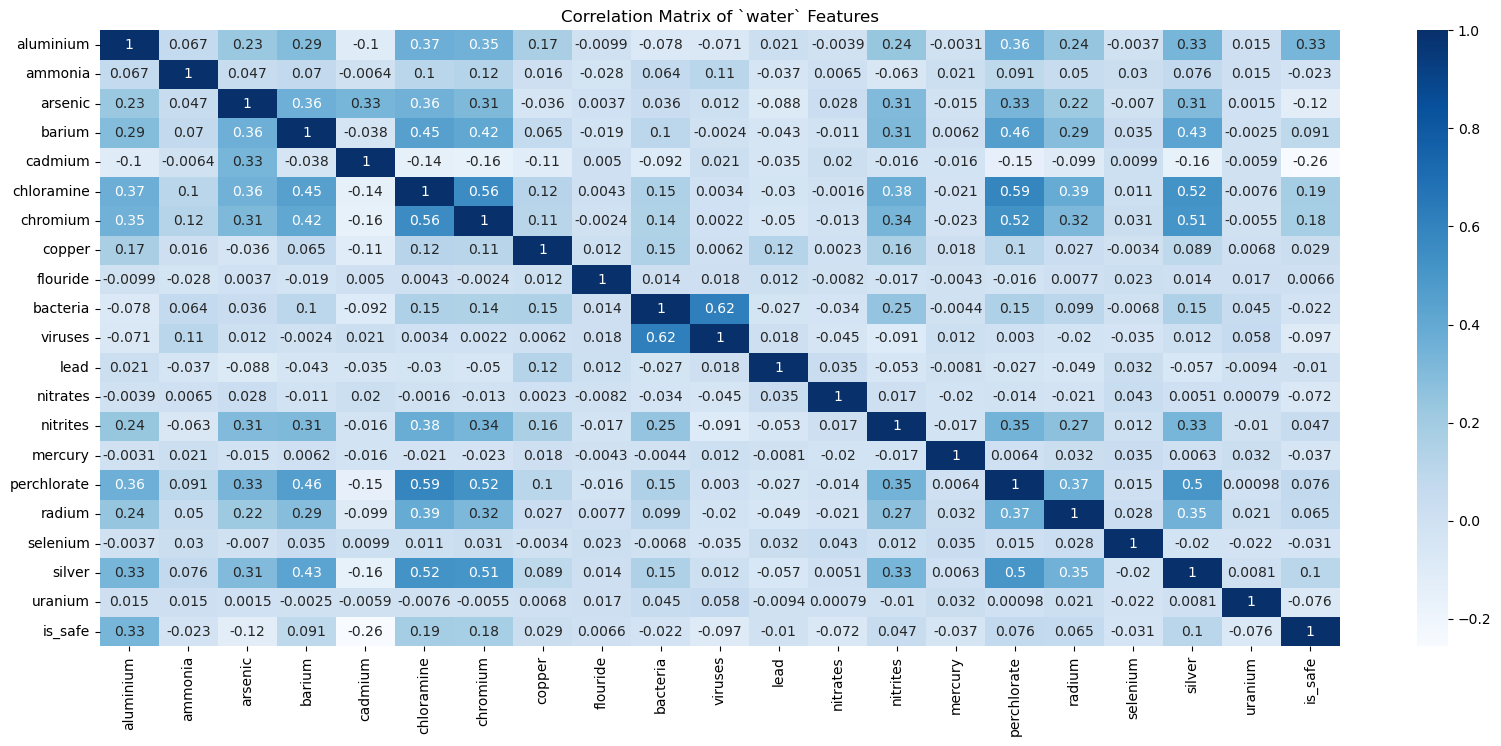

In [42]:
# Create a correlation matrix
water_corr_matrix = water.corr()

# Create a heatmap of the correlation matrix & Set the title and labels for the plot
plt.figure(figsize=(20, 8))
ax = sns.heatmap(water_corr_matrix, cmap='Blues', annot=True)
ax.set_title('Correlation Matrix of `water` Features')
plt.show()

- (6.3) Create a pairplot including the columns "arsenic", "cadmium", "chromium", "copper", "bacteria", "viruses", "lead", "nitrates", "mercury"; and color by the class "is_safe" **1 points**

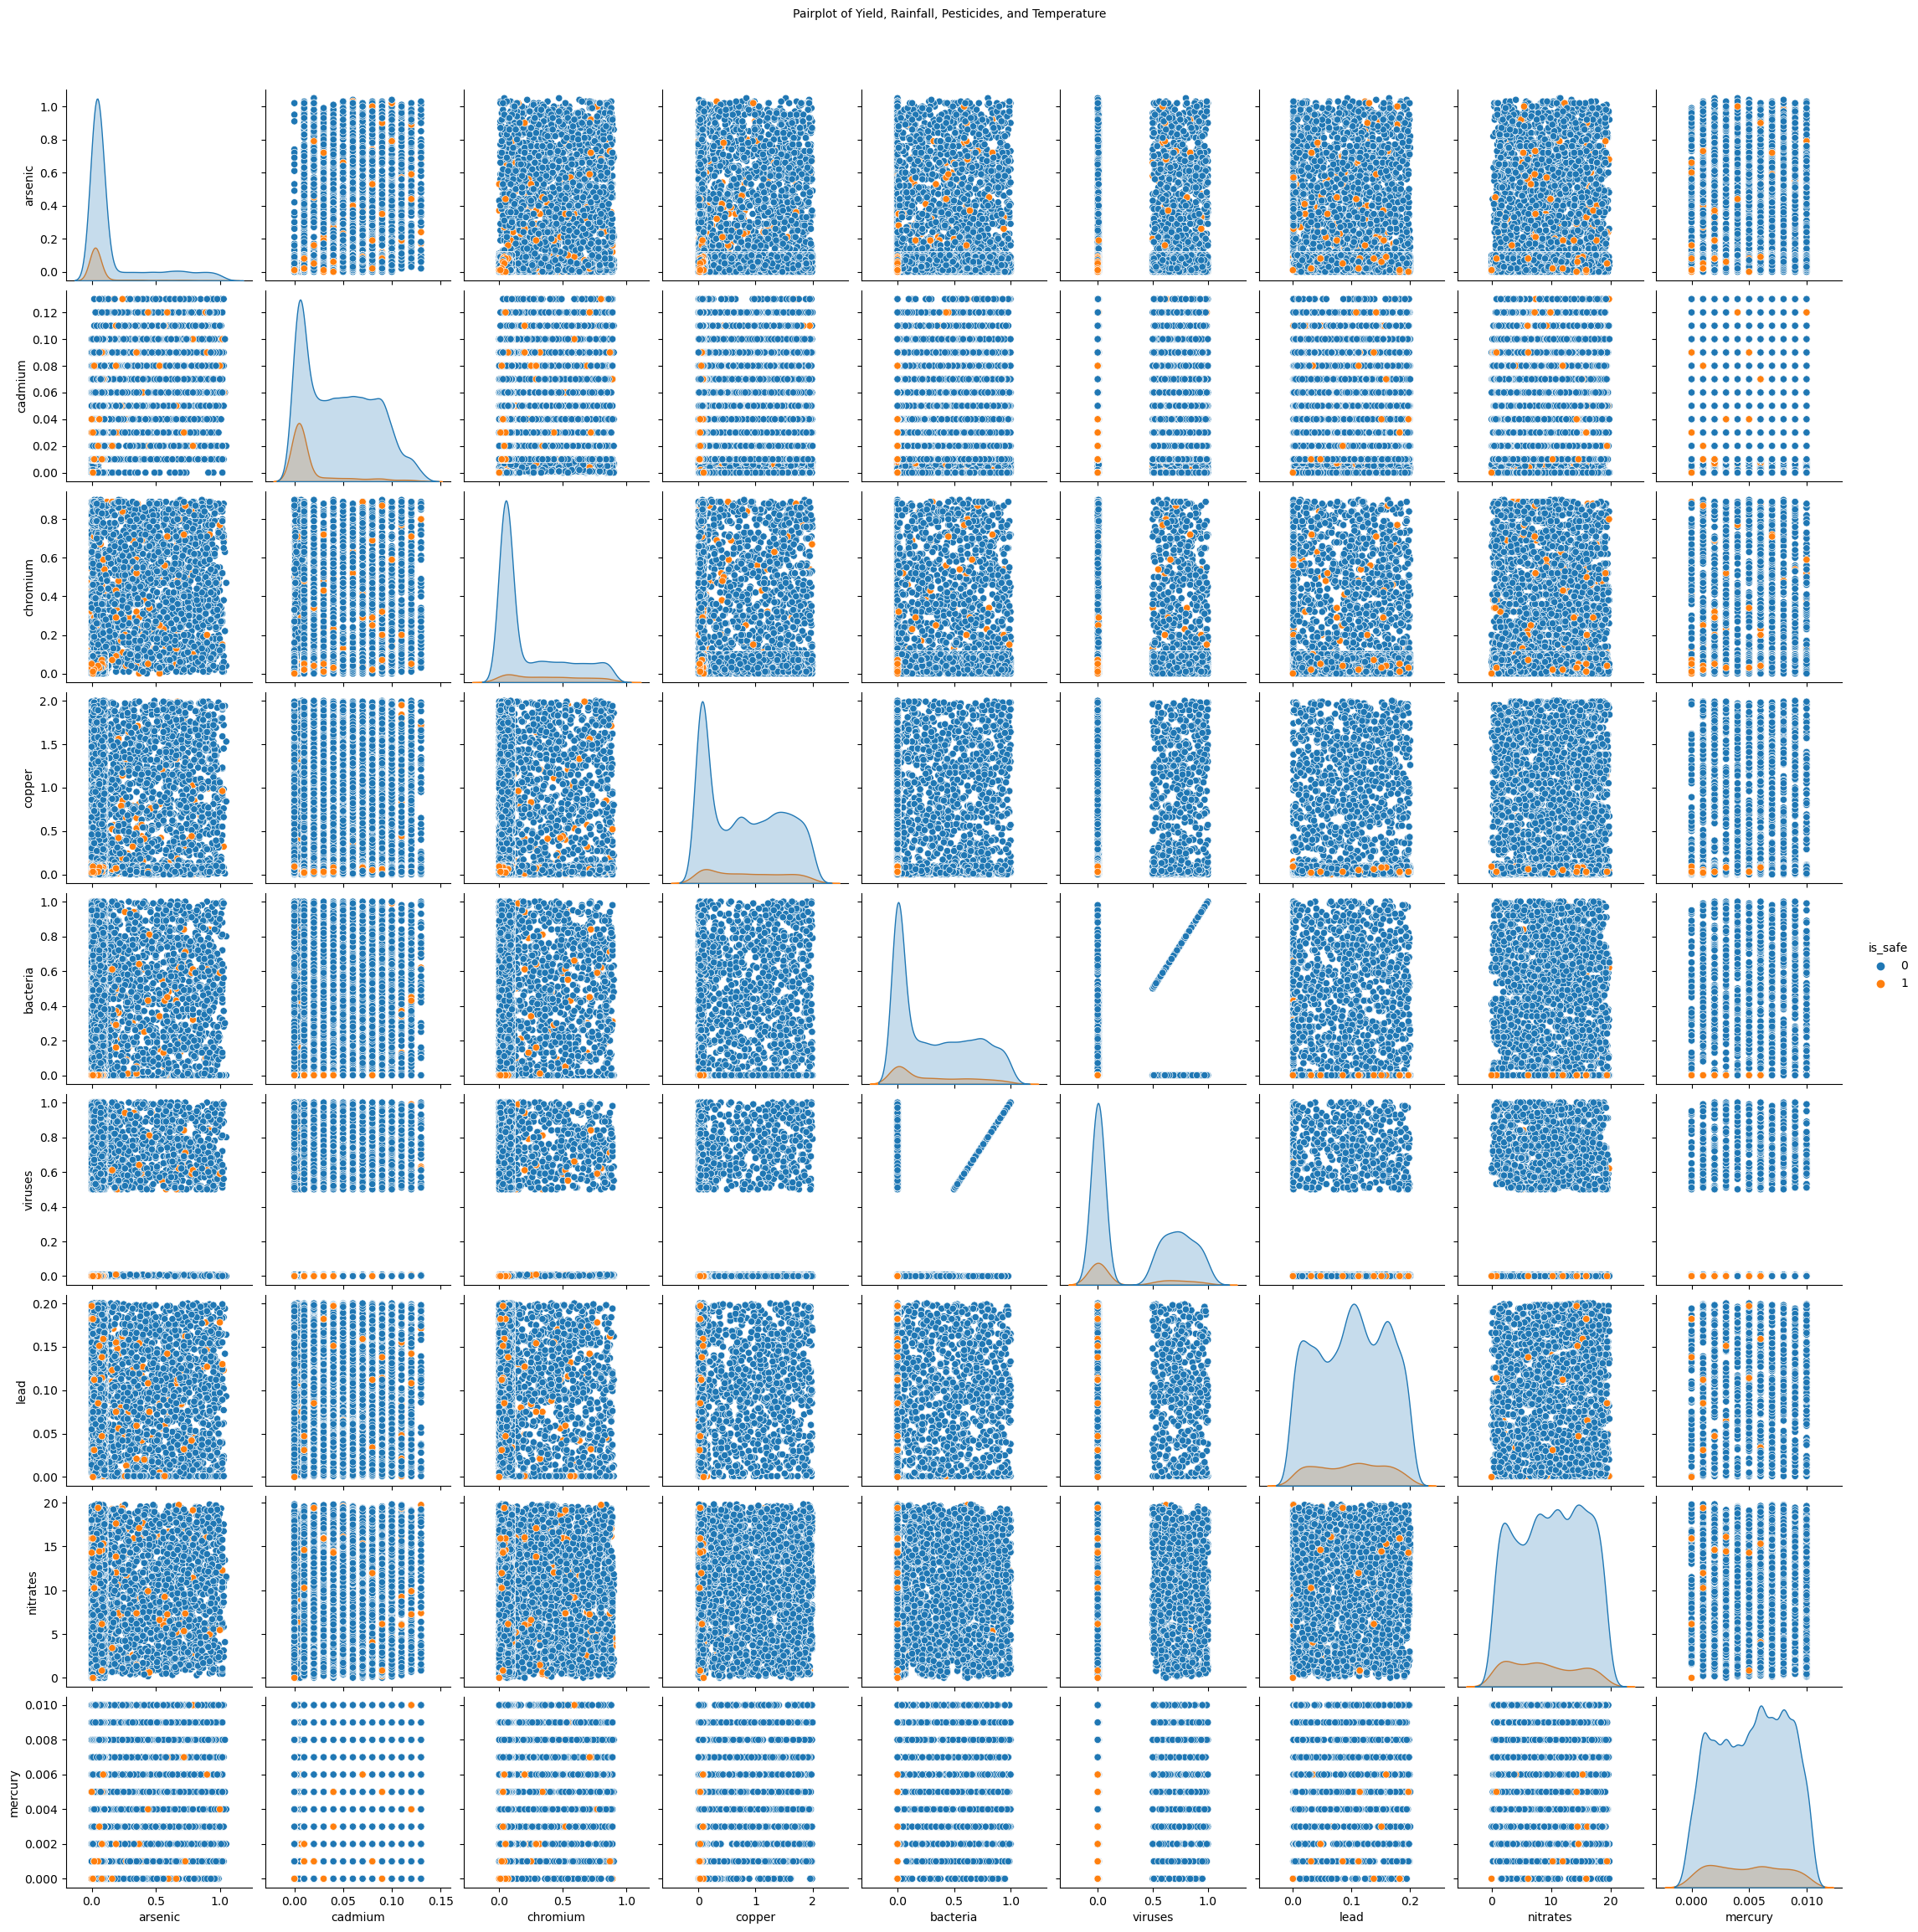

In [43]:
# Select the relevant columns for the pairplot 
water_comp = water.loc[:, ["arsenic", "cadmium", "chromium", "copper", "bacteria", "viruses", "lead", "nitrates", "mercury" , "is_safe"]]

# Create the pairplot
sns.pairplot(water_comp, hue="is_safe")
plt.suptitle('Pairplot of Yield, Rainfall, Pesticides, and Temperature', fontsize=10, y=1.03)

# Show the plot
plt.show()

- Feel free to pursue your exploration to better understand your dataset. Although not graded, this might help you better understanding the problem and answer the following questions.

In [44]:
# YOUR CODE HERE


### Question 7: Preprocessing

We will try to predict the class "is_safe", using all the other features.

#### Legend

`X_w` features.

`y_w` outcome variable

`X_w_train` new features in the train set

`y_w_train` new outcome variable in the train set

`X_w_test` new features in the test set

`y_w_test` new outcome variable in the test set

- (7.1) Extract your features and outcome. How many observations do we have of class 0 and of class 1? **1 point**

In [45]:
X_w = water.drop(columns='is_safe')
y_w = water['is_safe']

# Count the number of observations (rows) corresponding to each value 
y_w.value_counts()

0    7084
1     912
Name: is_safe, dtype: int64

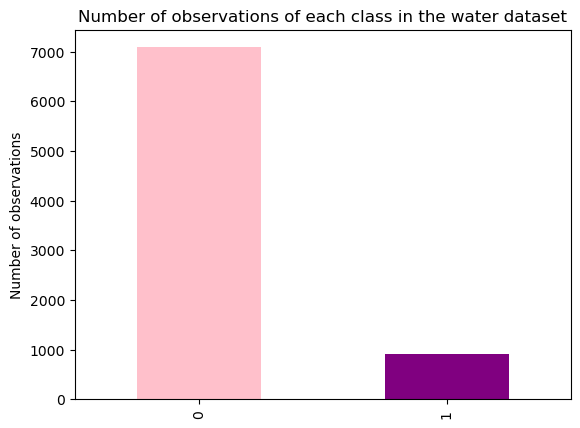

In [46]:
y_w.value_counts().plot.bar(color=['pink', 'purple'], grid=False)
plt.ylabel('Number of observations')
plt.title('Number of observations of each class in the water dataset');

#### Comment on the results:

We have an imbalanced dataset with 7084 observations labeled as "not safe" (class 0) and only 912 labeled as "safe" (class 1). This imbalance can affect the quality of our predictions. To address this issue and as we saw in class, one approach that we could take is to assign weights to each class during the training, giving more importance to the minority class. 

However, in our case, the class we are most interested in predicting is the "not safe" class. Therefore, correctly identifying that the water is unsafe is more important than correctly identifying both classes.

For this reason, we won't perform any kind of transformation.

- (7.2) Split between training and test set **1 point**

*Note*: Use as parameters for splitting: `test_size=0.2`, `random_state=39`, `shuffle=True`

In [47]:
#Split data set into a train and a test data sets
X_w_train, X_w_test, y_w_train, y_w_test = train_test_split(X_w, y_w, test_size=0.2, random_state=39, shuffle=True)

print(f"The training set has {X_w_train.shape[0]} observations, and the test set has {X_w_test.shape[0]} observations.")

The training set has 6396 observations, and the test set has 1600 observations.


- (7.3) Rescale your features using `StandardScaler` **1 point**

The `StandardScaler` is used to standardize and scale features by subtracting the mean and dividing by the standard deviation of each feature.

In [48]:
# Define the scaler
scaler = StandardScaler()

# Fit the scaler
scaler.fit(X_w_train) # here the scaler learns the min and max of each attribute from the training set

# Transform the train and the test set
X_w_train = scaler.transform(X_w_train)
X_w_test = scaler.transform(X_w_test)

### Question 8: Logistic Regression

- (8.1) Build and train a logistic regression classifier, using as parameters `penalty='l2'`, `solver='lbfgs'`, `max_iter=1000` **1 point**

#### Legend

`model_water_lr` logistic regression classifier 

`y_w_pred_lr_test` predictions on the test data (LR model)

`y_w_pred_lr_train` predictions on the train data (LR model)

`accuracy_train_lr` accuracy of the train data (LR model)

`accuracy_test_lr` accuracy of the test data (LR model)

`defaultrate` default rate of the LR model

`precision_lr` precision of the LR model (claas 1)

`recall_lr` recall of the LR model (claas 1)

`f1_lr` F1 score of the LR model (claas 1)

In [49]:
# Set up our model
model_water_lr = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)

# Fit our model
model_water_lr.fit(X_w_train, y_w_train)

# Dataframe with the intercept and coefficients (weights) of the logistic model
model_coeff_log_water = pd.DataFrame(np.concatenate((model_water_lr.intercept_, model_water_lr.coef_.flatten())), 
                     index=["Intercept"] + list(X_w.columns.values),
                     columns=['Coefficients logistic model'])
model_coeff_log_water

Coefficients logistic model
Intercept                      -2.901778
aluminium                       0.894668
ammonia                        -0.215239
arsenic                        -0.678496
barium                          0.184931
cadmium                        -0.751893
chloramine                      0.446374
chromium                        0.306908
copper                         -0.224668
flouride                        0.077818
bacteria                        0.259745
viruses                        -0.459151
lead                           -0.116420
nitrates                       -0.268615
nitrites                       -0.147951
mercury                        -0.110257
perchlorate                    -0.463241
radium                         -0.089920
selenium                       -0.169536
silver                         -0.230712
uranium                        -0.359918

It seems like the level of aluminium cadmium and arsenic were the most important features to predict the water safety, at least in our model.

- (8.2) Compute the accuracy on the training and test set. Compare it to the default rate. **1 point** 

Once our model has been trained, we can use `predict()` to predict new values. We predict the values from the test set to then evaluate the model, estimating the accuracy of our classifier.

We can even access the probabilities that one observation belongs to one class or the other with predict_proba(). The largest probability determines the predicted class.

In [50]:
y_w_pred_lr_test = model_water_lr.predict(X_w_test)
y_w_pred_lr_train = model_water_lr.predict(X_w_train)

# Dataframe with probabilities that our first 5 observations belong to each class
model_water_proba = pd.DataFrame(model_water_lr.predict_proba(X_w_test)[0:4], 
                     columns=['Probability unsafe water', 'Probability safe water'])
model_water_proba

Probability unsafe water  Probability safe water
0                  0.903388                0.096612
1                  0.980930                0.019070
2                  0.491881                0.508119
3                  0.640144                0.359856

We will now evaluate the performance of our classifier using the accuracy metric:
- Accuracy:fraction of correct vs total predictions:
$$ \mathrm{Accuracy} = \frac{\# \mathrm{\, correct \, predictions}}{\# \mathrm{\, total \, predictions}} $$

In [51]:
# Accuracy on the test set and train set
accuracy_train_lr = round(accuracy_score(y_w_train, y_w_pred_lr_train), 3)
accuracy_test_lr = round(accuracy_score(y_w_test, y_w_pred_lr_test), 3)

print('Accuracy of LR on training set: {:.3f}'.format(accuracy_train_lr))
print('Accuracy of LR on test set: {:.3f}'.format(accuracy_test_lr))

Accuracy of LR on training set: 0.906
Accuracy of LR on test set: 0.911


To define if our accuracy is appropiate or not, we will compare it with the default rate.
The accuracy of our classifier should be better than the default rate. 

$$\text{Default rate} = \frac{\# \text{ most frequent class}}{\# \text{ total observations}}$$

Let's calculate this default rate!

In [52]:
# Compute the default rate
safe_0 = water.loc[water["is_safe"] == 0].shape[0]
print('# occurrence of class 0: ', safe_0)

safe_1 = water.loc[water["is_safe"] == 1].shape[0]
print('# occurence of class 1: ', safe_1)

defaultrate = max(safe_0, safe_1)/(water["is_safe"].shape[0])
print(f'Default rate = {defaultrate:0.4f}')

# occurrence of class 0:  7084
# occurence of class 1:  912
Default rate = 0.8859


#### Comment on the results:

Our model achieved an **accuracy** of around 0.91 for both the training and test sets, meaning it correctly predicted 91 out of 100 instances. 

However, the accuracy alone doesn't provide useful information about the usefulness of the model, so we need to compare it to the default rate. 

The **default rate** represents the size of the most common class, which in this case is 7084 out of 7996, or 0.8859. 

Consequently, we can conclude that our model slightly improved the probability of making a correct prediction.

- (8.3) Plot a heatmap of the confusion matrix. Class 1 is the positive class. How many false positive did we obtain? **1 point**

The confusion matrix allows us to get more details on the performance of our model. It will allow us to see what our classification model is getting right and what types of errors it is making.

Here is how a confusion matrix looks like: 

|   | Class 0 predicted  | Class 1 predicted  |    
|---|---|---|
| **Class 0 actual**  |  TN |FP   |    
| **Class 1 actual**  | FN  | TP  |   


Where TP = true positive, FN = false negative, FP = false positive and TN = true negative. 

Here class 1 is considered the "True" class.

In [53]:
confusion_matrix(y_w_test, y_w_pred_lr_test)

array([[1403,   21],
       [ 122,   54]], dtype=int64)

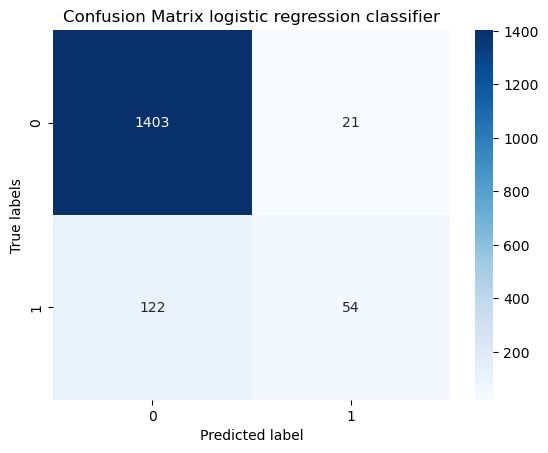

In [54]:
# Confusion matrix
confusion_water = confusion_matrix(y_w_test, model_water_lr.predict(X_w_test))

# Heatmap of confusion matrix
sns.heatmap(confusion_water, annot=True, cmap='Blues', fmt='.4g')
plt.xlabel('Predicted label')
plt.ylabel('True labels')
plt.title('Confusion Matrix logistic regression classifier');

On the diagonal of the confusion matrix are our correct predictions, while the off-diagonal elements are incorrect predictions.

As we can see in the heatmap, we obtain:
- 1403 True Negatives
- 122 False Negatives
- 21 False Positive
- 54 True Positives

In this particular case, it is imperative that we prioritize the reduction of false negatives. This is because falsely confirming that the water is safe when it is actually not can pose an extremely dangerous threat to the population.

- (8.4) What is the precision, recall, and f1 score of class 1? Interpret the result. **1 point**

**Precision**: The number of true positives over the number of positive  predictions. Precision tells us how often the model was correct when it predicted true.

$$\text{Precision} = \frac{\# \text{ true positives}}{\# \text{ predicted positives}} = \frac{ \text{TP}}{\text{TP+FP}}$$

**Recall**: The number of true positives over the number of actual positives. Recall answers the question, “What fraction of the positives did we get correct?”  

$$\text{Recall} = \frac{\# \text{ true positives}}{\# \text{ actual positives}} = \frac{\text{TP}}{ \text{TP+FN}}$$ 

In many settings, both precision and recall are equally important and a compound metric known as the **F1-score** is used:

$$\text{F1} = 2 \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}$$

The F1 score is bounded between 0 and 1. It will only achieve a value of 1 if both precision and recall are exactly 1.

In [55]:
# manually:
TN = 1403 
FN =122 
FP= 21 
TP = 54

precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score_ = 2 * (precision * recall) / (precision + recall)

print("Precision of class 1:", precision)
print("Recall of class 1:", recall)
print("F1 score of class 1:", f1_score_)

Precision of class 1: 0.72
Recall of class 1: 0.3068181818181818
F1 score of class 1: 0.4302788844621514


In [56]:
# Compute and print precision, recall, and f1 score for class 1
precision_lr = round(precision_score(y_w_test, y_w_pred_lr_test), 3)
recall_lr = round(recall_score(y_w_test, y_w_pred_lr_test), 3)
f1_lr = round(f1_score(y_w_test, y_w_pred_lr_test), 3)


print('The precision for class 1 (safe water) is: {:0.4f}'.format(precision_score(y_w_test, y_w_pred_lr_test)))
print('The recall for class 1 is: {:0.4f}'.format(recall_score(y_w_test, y_w_pred_lr_test)))
print('The F1 score for class 1 is: {:0.4f}'.format(f1_score(y_w_test, y_w_pred_lr_test)))

The precision for class 1 (safe water) is: 0.7200
The recall for class 1 is: 0.3068
The F1 score for class 1 is: 0.4303


#### Comment on the results:

- The **precision** for class 1 (safe water) is 0.720. This means that out of all the samples the model predicted as belonging to class 1, 72.0% of them actually belong to class 1 (safe water).

- The **recall** for class 1 is 0.307. This means that out of all the samples that truly belong to class 1, the model correctly identified only 30.7% of them.

- The **F1 score** for class 1 is 0.430. This is the harmonic mean of precision and recall, and provides a balanced measure of the two. The F1 score for class 1 is 0.430, which indicates that the model has an overall moderate performance for class 1.

To sum up, these results suggest that the model's performance for predicting safe water (class 1) is not very good. The model is making quite a few false positive predictions (low precision), and is also missing a lot of true positive predictions (low recall). The F1 score of 0.430 suggests that there is room for improvement in the model's performance for class 1.

- (8.5) Build and train a logistic regression classifier with cross-validation, using 5 folds **1 point**

#### Legend

`model_water_log_cv` logistic regression classifier with cross-validation

`y_w_pred_lr_cv_test` predictions on the test data (LR with CV model)

`y_w_pred_lr_cv_train` predictions on the train data (LR with CV model)

`accuracy_train_lr_cv` accuracy of the train data (LR with CV model)

`accuracy_test_lr_cv` accuracy of the test data (LR with CV model)

`precision_lr_cv` precision of the LR with CV model (claas 1)

`recall_lr_cv` recall of the LR with CV model (claas 1)

`f1_lr_cv` F1 score of the LR with CV model (claas 1)

In [57]:
# Set up our model
model_water_log_cv = LogisticRegressionCV(penalty='l2', solver='lbfgs', cv=5, max_iter=1000)

# Fit our model
model_water_log_cv.fit(X_w_train, y_w_train)

# Make predictions on the test and train data
y_w_pred_lr_cv_test = model_water_log_cv.predict(X_w_test)
y_w_pred_lr_cv_train = model_water_log_cv.predict(X_w_train)

In [58]:
# Dataframe with the intercept and coefficients (weights) of the logistic model
model_water_log_cv_coeff = pd.DataFrame(np.concatenate((model_water_log_cv.intercept_, model_water_log_cv.coef_.flatten())), 
                     index=["Intercept"] + list(X_w.columns.values),
                     columns=['Coefficients logistic model'])
model_water_log_cv_coeff

Coefficients logistic model
Intercept                      -2.905286
aluminium                       0.896901
ammonia                        -0.215916
arsenic                        -0.681170
barium                          0.185698
cadmium                        -0.753239
chloramine                      0.447709
chromium                        0.307575
copper                         -0.225701
flouride                        0.078042
bacteria                        0.262373
viruses                        -0.461945
lead                           -0.116727
nitrates                       -0.269264
nitrites                       -0.149004
mercury                        -0.110400
perchlorate                    -0.465460
radium                         -0.090474
selenium                       -0.169994
silver                         -0.231879
uranium                        -0.360905

- (8.6) Plot a heatmap of the confusion matrix. Compute the accuracy on the training and test set; as well as the precision, recall, and f1 score of class 1. How do your metrics compare to your model without cross-validation? **1 point**

*Note*: You can, but not have to, create a function to calculate your evaluation metrics since we will perform the same operation later on.

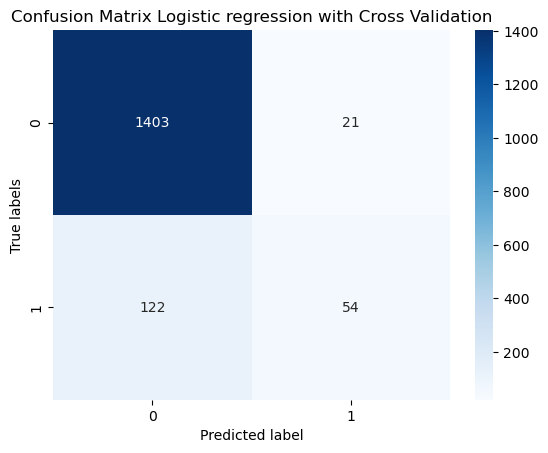

In [59]:
# Confusion matrix
confusion_cv = confusion_matrix(y_w_test, model_water_log_cv.predict(X_w_test))

# Heatmap of confusion matrix
sns.heatmap(confusion_cv, annot=True, cmap='Blues', fmt='.4g')
plt.xlabel('Predicted label')
plt.ylabel('True labels')
plt.title('Confusion Matrix Logistic regression with Cross Validation');

In [60]:
# Accuracy on the test set and train set
accuracy_train_lr_cv = round(accuracy_score(y_w_train, y_w_pred_lr_cv_train), 3)
accuracy_test_lr_cv = round(accuracy_score(y_w_test, y_w_pred_lr_cv_test), 3)

print('Accuracy of LR with CV on training set: {:.4f}'.format(accuracy_train_lr_cv))
print('Accuracy of LR with CV on test set: {:.4f}'.format(accuracy_test_lr_cv))

# Compute and print precision, recall, and f1 score for class 1
precision_lr_cv = round(precision_score(y_w_test, y_w_pred_lr_cv_test), 3)
recall_lr_cv = round(recall_score(y_w_test, y_w_pred_lr_cv_test), 3)
f1_lr_cv = round(f1_score(y_w_test, y_w_pred_lr_cv_test), 3)


print('The precision for class 1 (safe water) is: {:0.4f}'.format(precision_score(y_w_test, y_w_pred_lr_cv_test)))
print('The recall for class 1 is: {:0.4f}'.format(recall_score(y_w_test, y_w_pred_lr_cv_test)))
print('The F1 score for class 1 is: {:0.4f}'.format(f1_score(y_w_test, y_w_pred_lr_cv_test)))

Accuracy of LR with CV on training set: 0.9060
Accuracy of LR with CV on test set: 0.9110
The precision for class 1 (safe water) is: 0.7200
The recall for class 1 is: 0.3068
The F1 score for class 1 is: 0.4303


In [61]:

models_accuracy_lr_lrcv = [[accuracy_train_lr,  accuracy_train_lr_cv], 
                   [accuracy_test_lr, accuracy_test_lr_cv]]

model_compar = pd.DataFrame(models_accuracy_lr_lrcv,
                    index = ['Train accuracy', 'Test accuracy'], 
                    columns=['LR model', 'CV model'])
model_compar

LR model  CV model
Train accuracy     0.906     0.906
Test accuracy      0.911     0.911

#### Comment on the results:

In this case, although the accuracy of the training set slightly increased when using cross-validation (see the individual results with more decimals), this difference was insufficient to result in an improvement in precision, recall, and F1 score.

Additionally, upon examining the confusion matrix, we observed that the predictions remained the same as in the model without cross-validation.

For this reason, we will continue improving our model.

### Question 9: KNN classifier

- (9.1) Build and train a KNN classifier with parameters `n_neighbors=7`, `p=2`, `weights='uniform'` **1 point**

#### Legend

`model_kNN` KNN model

`y_w_pred_testKNN` predictions on the test data (KNN model)

`y_w_pred_trainKNN` predictions on the train data (KNN model)

`accuracy_train_knn` accuracy of the train data (KNN model)

`accuracy_test_knn` accuracy of the test data (KNN model)

`precision_knn` precision of the KNN model (claas 1)

`recall_knn` recall of the KNN model (claas 1)

`f1_knn` F1 score of the KNN model (claas 1)

In [62]:
# Set up our model
model_kNN = KNeighborsClassifier(n_neighbors=7, p=2, weights='uniform')

# Fit our model
model_kNN.fit(X_w_train, y_w_train)

# Make predictions on the test and train data
y_w_pred_testKNN = model_kNN.predict(X_w_test)
y_w_pred_trainKNN = model_kNN.predict(X_w_train)

- (9.2) Plot a heatmap of the confusion matrix. Compute the accuracy on the training and test set; as well as the precision, recall, and f1 score of class 1. How do your metrics compare to your previous models? **1 point**

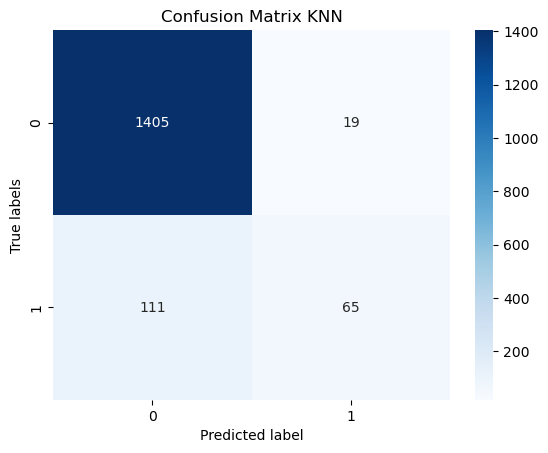

In [63]:
# Confusion matrix
confusion_knn = confusion_matrix(y_w_test, y_w_pred_testKNN)

# Heatmap of confusion matrix
sns.heatmap(confusion_knn, annot=True, cmap='Blues', fmt='.4g')
plt.xlabel('Predicted label')
plt.ylabel('True labels')
plt.title('Confusion Matrix KNN');

In [64]:
# Compute and print the accuracy score
accuracy_train_knn = round(accuracy_score(y_w_train, y_w_pred_trainKNN), 3)
accuracy_test_knn = round(accuracy_score(y_w_test, y_w_pred_testKNN), 3)

print('Accuracy of KNN on training set: {:.3f}'.format(accuracy_train_knn))
print('Accuracy of KNN on test set: {:.3f}'.format(accuracy_test_knn))

# Compute and print the precision, recall, and f1 score of class 1
precision_knn = round(precision_score(y_w_test, y_w_pred_testKNN), 3)
recall_knn = round(recall_score(y_w_test, y_w_pred_testKNN), 3)
f1_knn = round(f1_score(y_w_test, y_w_pred_testKNN), 3)

print('Precision of class 1: {:.3f}'.format(precision_knn))
print('Recall of class 1: {:.3f}'.format(recall_knn))
print('F1 score of class 1: {:.3f}'.format(f1_knn))

Accuracy of KNN on training set: 0.932
Accuracy of KNN on test set: 0.919
Precision of class 1: 0.774
Recall of class 1: 0.369
F1 score of class 1: 0.500


#### Accuracy comparation
We can see that with this model, both the test and train accuracy are higher than the models developed in question 8. 

However, it is possible to observe that the train accuracy is higher than the test accuracy. This may indicate an overfitting trend.

#### Precision, recall and F1 score comparation
We can observe that all the metrics have improved in the kNN classifier model. On the one hand, for class 1 it increased >0.05 in all 3 metrics. On the other hand, the metrics for class 0 have also improved, but to a lesser extent.

- (9.3) Use `GridSearchCV` to explore different parameters for your model: `n_neighbors` between 1 and 11, `p` between 1 and 3, and `weights` either 'uniform' or 'distance' **1 point**

In [65]:
# Define parameters to test
grid = {'n_neighbors':np.arange(1,12),     # array from 1 to 11 neighbors as the stop number is not included
        'p':np.arange(1,4),                # array from 1 to 3, distance metrics
        'weights':['uniform','distance']   # weights
       }

# Define and fit model
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=5) # 5 fold cross validation
knn_cv.fit(X_w_train, y_w_train)

# Print results
print("Hyperparameters:", knn_cv.best_params_)
print("Train Score: {:0.2f}".format(knn_cv.best_score_))
print("Test Score: {:0.2f}".format(knn_cv.score(X_w_test, y_w_test)))

Hyperparameters: {'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
Train Score: 0.91
Test Score: 0.92


#### Comment on the results:

The result suggests that a KNN classifier was trained using a specific set of hyperparameters, and that the model achieved a train score of 0.91 and a test score of 0.92.

The **hyperparameters** used in the model were 'n_neighbors': 9, 'p': 2, and 'weights': 'uniform'. This means that the model was using the Euclidean distance metric (p=2) and considered the 9 nearest neighbors of each point to make its predictions. Additionally, the model assigned equal weights to all the neighbors (weights='uniform').

On the one hand, having a **train score** of 0.91 means that the model was able to correctly classify 91% of the data in the training set. On the other hand, having a **test score** of 0.92 means that the model was able to correctly classify 92% of the data in the test set.

To sum up, the results indicate that the KNN model performed well on this particular dataset.

- (9.4) For your "optimal" model, compute the accuracy on the training and test set; as well as the precision, recall, and f1 score of class 1. How do your metrics compare to your previous models? **1 point** 

#### Legend

`optimal_model_knn` "optimal" model

`y_train_w_pred_knn_optimal` predictions on the train data (optimal model)

`y_test_w_pred_knn_optimal` predictions on the test data (optimal model)

`accuracy_train_knn_optimal` accuracy of the train data (optimal model)

`accuracy_test_knn_optimal` accuracy of the test data (optimal model)

`precision_knn_optimal` precision of the optimal model (claas 1)

`recall_knn_optimal` recall of the optimal model (claas 1)

`f1_knn_optimal` F1 score of the optimal model (claas 1)

In [66]:
# Set up the model
optimal_model_knn = KNeighborsClassifier(n_neighbors=9, p=2, weights='uniform')

# Fit the model
optimal_model_knn.fit(X_w_train, y_w_train)

# Make predictions on the test and train data
y_train_w_pred_knn_optimal = optimal_model_knn.predict(X_w_train)
y_test_w_pred_knn_optimal = optimal_model_knn.predict(X_w_test)

In [67]:
# compute and print the accuracy score
accuracy_train_knn_optimal = round(accuracy_score(y_w_train, y_train_w_pred_knn_optimal), 3)
accuracy_test_knn_optimal = round(accuracy_score(y_w_test, y_test_w_pred_knn_optimal), 3)

print('Accuracy of KNN on training set: {:.3f}'.format(accuracy_train_knn_optimal))
print('Accuracy of KNN on test set: {:.3f}'.format(accuracy_test_knn_optimal))

Accuracy of KNN on training set: 0.928
Accuracy of KNN on test set: 0.923


Let's display all the accuracies we have calculated:

In [68]:
# Gather results in a dataframe:
models_accuracy = [[accuracy_train_lr,  accuracy_train_lr_cv, accuracy_train_knn, accuracy_train_knn_optimal], 
                   [accuracy_test_lr, accuracy_test_lr_cv, accuracy_test_knn, accuracy_test_knn_optimal]]

# Display comparative table
model_compar_accuracy = pd.DataFrame(models_accuracy,
                    index = ['Train accuracy', 'Test accuracy'], 
                    columns=['LR model', 'CV model', 'Knn classifier', 'Knn optimal'])
model_compar_accuracy

LR model  CV model  Knn classifier  Knn optimal
Train accuracy     0.906     0.906           0.932        0.928
Test accuracy      0.911     0.911           0.919        0.923

#### Comment on the results:

As we can observe in the table above, the results suggest that the **optimized KNN model** is the most effective classification model for this dataset, as it achieves the highest test accuracy while also maintaining a reasonable level of train accuracy.

In [69]:
# Compute and print precision, recall, and f1 score for class 1
precision_knn_optimal = round(precision_score(y_w_test, y_test_w_pred_knn_optimal), 3)
recall_knn_optimal = round(recall_score(y_w_test, y_test_w_pred_knn_optimal), 3)
f1_knn_optimal = round(f1_score(y_w_test, y_test_w_pred_knn_optimal), 3)

print('Precision of KNN on test set for class 1: {:.3f}'.format(precision_knn_optimal))
print('Recall of KNN on test set for class 1: {:.3f}'.format(recall_knn_optimal))
print('F1 score of KNN on test set for class 1: {:.3f}'.format(f1_knn_optimal))

Precision of KNN on test set for class 1: 0.844
Recall of KNN on test set for class 1: 0.369
F1 score of KNN on test set for class 1: 0.514


Let's display all the statistics of the different models that we have calculated:

In [70]:
# Gather results in a dataframe:
models_stat = [[precision_lr, precision_lr_cv, precision_knn, precision_knn_optimal], 
                   [recall_lr, recall_lr_cv, recall_knn, recall_knn_optimal],
                       [f1_lr, f1_lr_cv, f1_knn, f1_knn_optimal]]

# Display comparative table
model_compar = pd.DataFrame(models_stat,
                    index = ['Precision', 'Recall', 'F1 score'], 
                    columns=['LR model', 'CV model', 'KNN classifier', 'Optimal KNN'])
model_compar

LR model  CV model  KNN classifier  Optimal KNN
Precision     0.720     0.720           0.774        0.844
Recall        0.307     0.307           0.369        0.369
F1 score      0.430     0.430           0.500        0.514

#### Comment on the results:

Looking at the table, we can see that the **Optimal KNN** model has the highest precision and F1 score values, indicating that it performs better in correctly identifying positive cases while keeping false positives low. However, the recall value for the Optimal KNN is still relatively low, indicating that it may miss some positive cases.

On the other hand, the KNN classifier has a higher recall value than the other models (see the decimals in the individual analysis), suggesting that it is better at identifying positive cases but may also have higher false positives.

Both the LR with CV model and the LR model have the same precision, recall, and F1 score values, indicating that they perform similarly in this task.

To sum up, we see that the optimal KNN outperforms in terms of precision and F1 scores.

### Question 10: Decision Trees

- (10.1) Build and train a Decision Tree with parameters `criterion = 'gini'`, `max_depth = 3` **1 point**

#### Legend

`model_tree` decision tree model

`y_test_w_pred_tree` predictions on the test data (Decision tree model)

`y_train_w_pred_tree` predictions on the train data (Decision tree model)

`accuracy_train_tree` accuracy of the train data (Decision tree model)

`accuracy_test_tree` accuracy of the test data (Decision tree model)

`precision_tree` precision of the Decision tree model (claas 1)

`recall_tree` recall of the Decision tree model (claas 1)

`f1_tree` F1 score of the Decision tree model (claas 1)

In [71]:
# Create model 
model_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)

# Fit model
model_tree.fit(X_w_train, y_w_train)

# Make predictions on the test and train data
y_train_w_pred_tree = model_tree.predict(X_w_train)
y_test_w_pred_tree = model_tree.predict(X_w_test)

- (10.2) Plot a heatmap of the confusion matrix. Compute the accuracy on the training and test set; as well as the precision, recall, and f1 score of class 1. How do your metrics compare to your previous models? **1 point**

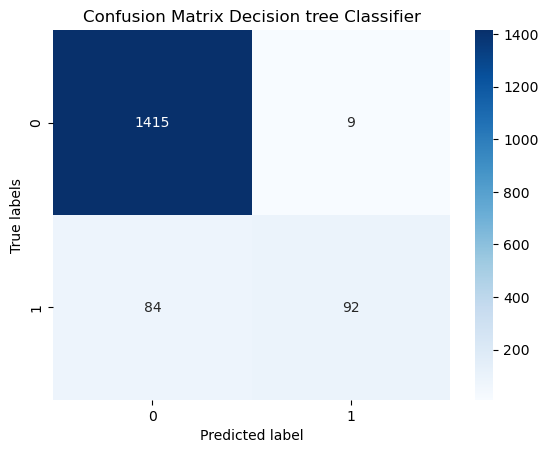

In [72]:
# Confusion matrix
confusion_tree = confusion_matrix(y_w_test, model_tree.predict(X_w_test))

# Heatmap of confusion matrix
sns.heatmap(confusion_tree, annot=True, cmap='Blues', fmt='.4g')
plt.xlabel('Predicted label')
plt.ylabel('True labels')
plt.title('Confusion Matrix Decision tree Classifier');

In [73]:
# Calculate the test and train accuracies
accuracy_test_tree = model_tree.score(X_w_test, y_w_test)
accuracy_train_tree = model_tree.score(X_w_train, y_w_train)

# Print the accuracies
print("Accuracy of Decision tree on test set is:", accuracy_test_tree)
print("Accuracy of Decision tree on train set is:", accuracy_train_tree)

Accuracy of Decision tree on test set is: 0.941875
Accuracy of Decision tree on train set is: 0.9405878674171357


In [74]:
# Precision, recall and f1 score of class 1 of the Decision tree classifier
precision, recall, f1_score, _ = precision_recall_fscore_support(y_w_test, y_test_w_pred_tree, average='binary')

# Create variables for precision, recall, and F1 score
precision_tree = precision
recall_tree = recall
f1_tree = f1_score

# Print the statistics
print('Precision of Decision tree on test set for class 1 is:', precision_tree)
print('Recall of Decision tree on test set for class 1 is:', recall_tree)
print('F1 Score of Decision tree on test set for class 1 is:', f1_tree)

Precision of Decision tree on test set for class 1 is: 0.9108910891089109
Recall of Decision tree on test set for class 1 is: 0.5227272727272727
F1 Score of Decision tree on test set for class 1 is: 0.6642599277978339


In [75]:
# Gather results in a dataframe:
models_statistics_all = [[accuracy_train_lr,  accuracy_train_lr_cv, accuracy_train_knn, accuracy_train_knn_optimal, accuracy_train_tree], 
                   [accuracy_test_lr, accuracy_test_lr_cv, accuracy_test_knn, accuracy_test_knn_optimal, accuracy_test_tree],
                       [precision_lr, precision_lr_cv, precision_knn, precision_knn_optimal, precision_tree], 
                   [recall_lr, recall_lr_cv, recall_knn, recall_knn_optimal, recall_tree],
                       [f1_lr, f1_lr_cv, f1_knn, f1_knn_optimal, f1_tree]]

# Display comparative table
model_compare_all = pd.DataFrame(models_statistics_all,
                    index = ['Train accuracy', 'Test accuracy', 'Precision', 'Recall', 'F1 score'], 
                    columns=['LR model', 'CV model', 'KNN classifier', 'Optimal KNN', 'Tree'])
model_compare_all

LR model  CV model  KNN classifier  Optimal KNN      Tree
Train accuracy     0.906     0.906           0.932        0.928  0.940588
Test accuracy      0.911     0.911           0.919        0.923  0.941875
Precision          0.720     0.720           0.774        0.844  0.910891
Recall             0.307     0.307           0.369        0.369  0.522727
F1 score           0.430     0.430           0.500        0.514  0.664260

#### Comment on the table:

Based on the results presented in the table, the decision tree model appears to be the most effective one in this classification.

When comparing the results of the decision tree column with the other columns, we can observe that the tree model achieves the highest performance in all metrics. Specifically, the tree model has the highest accuracy on both the train and test sets, as well as the highest precision, recall, and F1 score.

- (10.3) Visualize your Decision Tree **1 point**

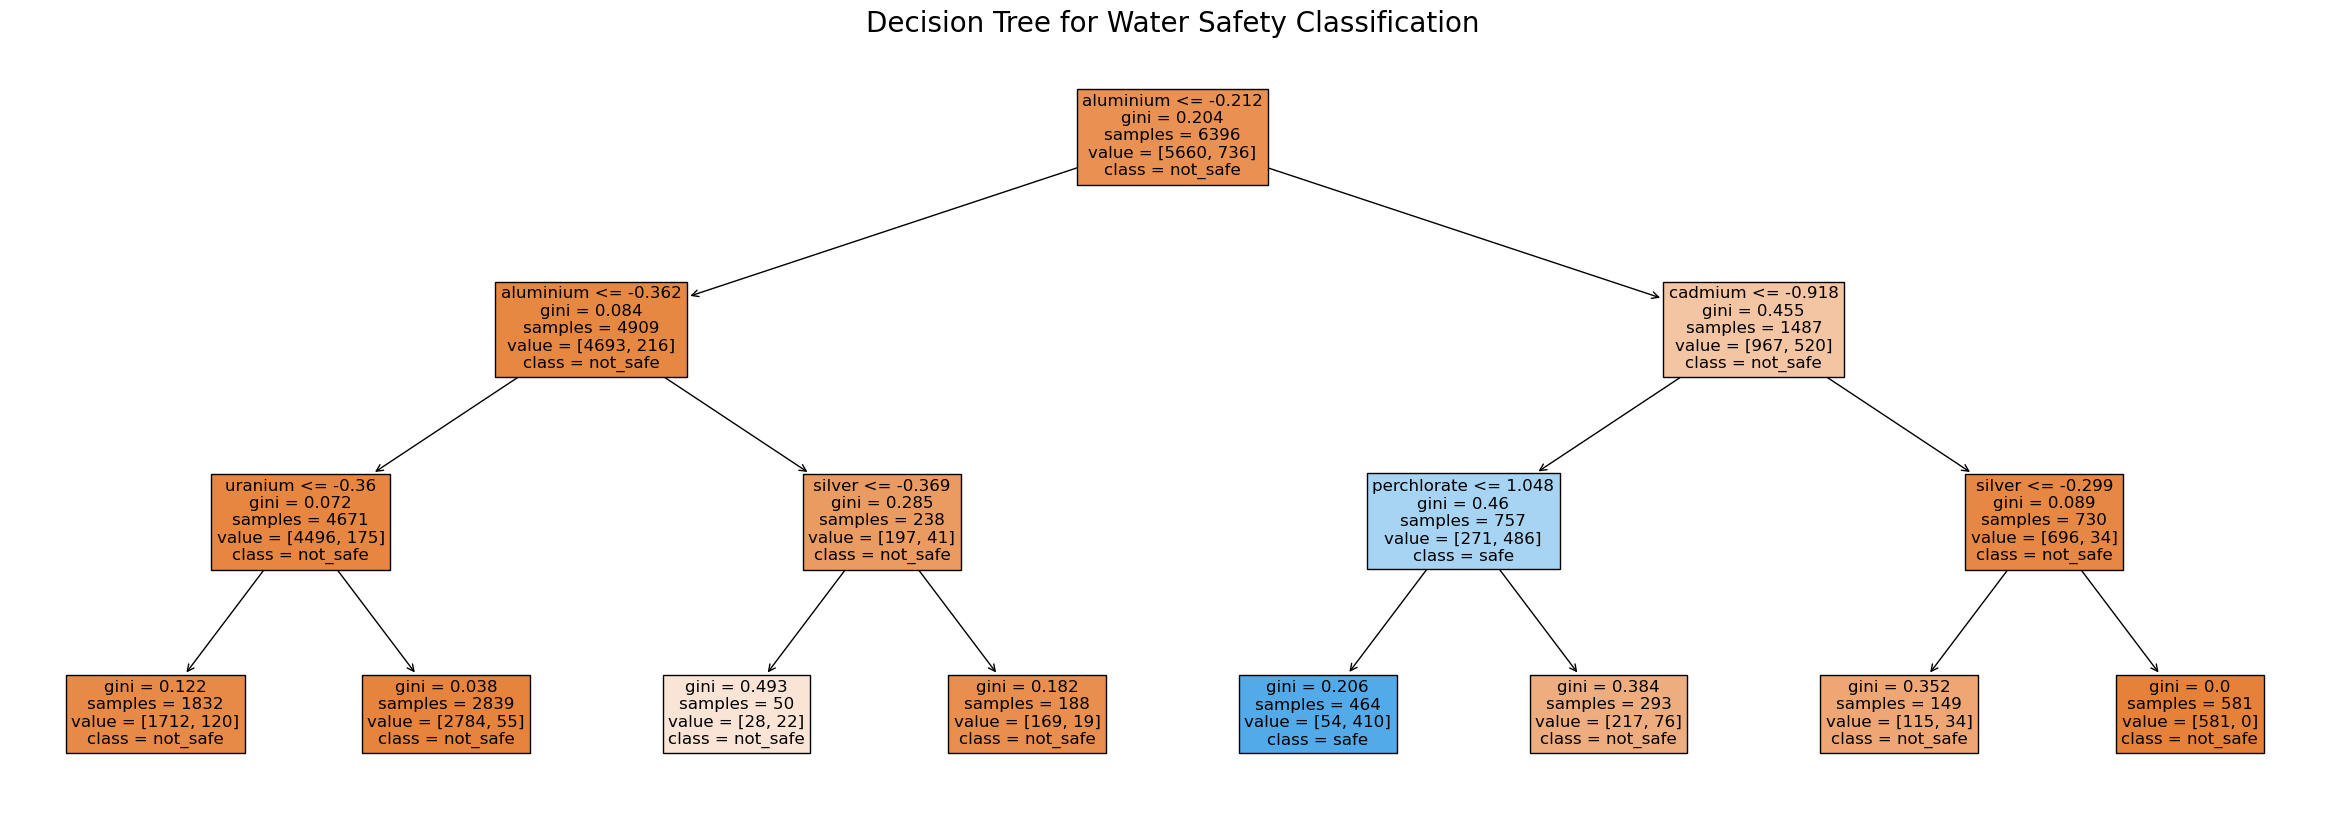

In [76]:
# Plot the decision tree
plt.figure(figsize=(30,10))
plot_tree(model_tree, filled=True, feature_names=('aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 
                                                  'chloramine', 'chromium', 'copper', 'flouride', 'bacteria', 
                                                  'viruses', 'lead', 'nitrates', 'nitrites', 'mercury', 
                                                  'perchlorate', 'radium', 'selenium', 'silver', 'uranium'),
          fontsize=12, class_names=['not_safe', 'safe'])
plt.title('Decision Tree for Water Safety Classification', fontsize=20)
plt.show()

#### Comment on the plot: 

The decision tree plot shows how our data points are divided based on certain criteria, leading to a final classification of "safe water" or "not safe water". 

The root of the tree represents all our data points, which are then split into different branches based on certain conditions. In this case, the first division leads to all data points being classified as "not safe water". However, the second division, based on the levels of cadmium and perchlorate, leads to a classification of "safe water".

- (10.4) Use `GridSearchCV` to explore different parameters for your model: `criterion` either 'gini' or 'entropy' and `max_depth` between 1 and 7 **1 point**

In [77]:
# Define hyperparameters to search over
grid_tree = {'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 8)
    }

# Define and fit model
dec_tree = DecisionTreeClassifier()
grid_search = GridSearchCV(dec_tree, grid_tree, cv=5)
grid_search.fit(X_w_train, y_w_train)

# Print best hyperparameters and test accuracy
print("Best hyperparameters:", grid_search.best_params_)
print("Test accuracy:", grid_search.score(X_w_test, y_w_test))
print("Train Score: {:0.2f}".format(grid_search.best_score_))
print("Test Score: {:0.2f}".format(grid_search.score(X_w_test, y_w_test)))

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 7}
Test accuracy: 0.965625
Train Score: 0.96
Test Score: 0.97


#### Comment on the results:

The result shows that the best hyperparameters are 'criterion': 'entropy' and 'max_depth': 7. This indicates that the decision tree model performs better when using entropy as the criterion for splitting and with a maximum depth of 7.

Furthermore, the test accuracy of 0.965 indicates that the model can predict the target variable with high accuracy on new, unseen data. The model is performing well on the test set, as indicated by the test score of 0.96, which is close to the train score of 0.96.

- (10.5) For your "optimal" model, compute the accuracy on the training and test set; as well as the precision, recall, and f1 score of class 1. How do your metrics compare to your previous models? **1 point** 

In [78]:
# Create model 
model_tree_optimal = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7)

# Fit model
model_tree_optimal.fit(X_w_train, y_w_train)

# Make predictions on the test and train data
y_train_w_pred_tree_optimal = model_tree_optimal.predict(X_w_train)
y_test_w_pred_tree_optimal = model_tree_optimal.predict(X_w_test)

In [79]:
# Calculate the test and train accuracies
accuracy_test_tree_optimal = model_tree_optimal.score(X_w_test, y_w_test)
accuracy_train_tree_optimal = model_tree_optimal.score(X_w_train, y_w_train)

# Print the accuracies
print("Accuracy of optimal Decision tree on test set is:", accuracy_test_tree_optimal)
print("Accuracy of optimal Decision tree on train set is:", accuracy_train_tree_optimal)

Accuracy of optimal Decision tree on test set is: 0.96375
Accuracy of optimal Decision tree on train set is: 0.9779549718574109


In [80]:
# Precision, recall and f1 score of class 1 of the Decision tree classifier
precision, recall, f1_score, _ = precision_recall_fscore_support(y_w_test, y_test_w_pred_tree_optimal, average='binary')

# Create variables for precision, recall, and F1 score
precision_tree_optimal = precision
recall_tree_optimal  = recall
f1_tree_optimal = f1_score

# Print the variables
print("Precision of optimal Decision tree on test set for class 1 is:", precision_tree_optimal)
print("Recall of optimal Decision tree on test set for class 1 is:", recall_tree_optimal)
print("F1 Score of optimal Decision tree on test set for class 1 is:", f1_tree_optimal)

Precision of optimal Decision tree on test set for class 1 is: 0.9097222222222222
Recall of optimal Decision tree on test set for class 1 is: 0.7443181818181818
F1 Score of optimal Decision tree on test set for class 1 is: 0.81875


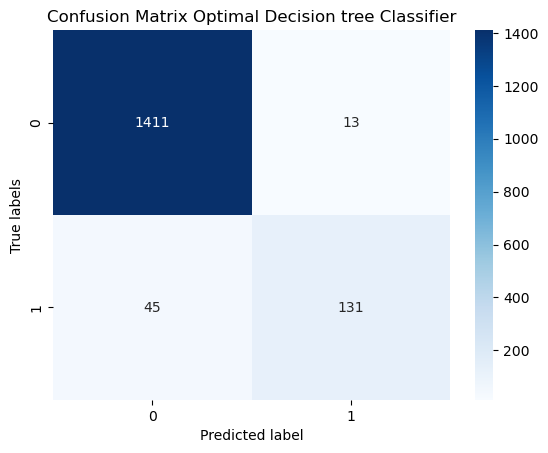

In [81]:
# Heatmap of the confusion matrix
# Confusion matrix
confusion_matrix_tree_optimal= confusion_matrix(y_w_test, model_tree_optimal.predict(X_w_test))

# Heatmap of confusion matrix
sns.heatmap(confusion_matrix_tree_optimal, annot=True, cmap='Blues', fmt='.4g')
plt.xlabel('Predicted label')
plt.ylabel('True labels')
plt.title('Confusion Matrix Optimal Decision tree Classifier');

In this matrix, we can see how the True Positives have been strongly increased.

In [82]:
# Gather results in a dataframe:
models_statistics_all = [[accuracy_train_lr,  accuracy_train_lr_cv, accuracy_train_knn, accuracy_train_knn_optimal, accuracy_train_tree, accuracy_train_tree_optimal ], 
                   [accuracy_test_lr, accuracy_test_lr_cv, accuracy_test_knn, accuracy_test_knn_optimal, accuracy_test_tree, accuracy_test_tree_optimal ],
                       [precision_lr, precision_lr_cv, precision_knn, precision_knn_optimal, precision_tree, precision_tree_optimal], 
                   [recall_lr, recall_lr_cv, recall_knn, recall_knn_optimal, recall_tree, recall_tree_optimal],
                       [f1_lr, f1_lr_cv, f1_knn, f1_knn_optimal, f1_tree, f1_tree_optimal]]

# Display comparative table
model_compare_all = pd.DataFrame(models_statistics_all,
                    index = ['Train accuracy', 'Test accuracy', 'Precision', 'Recall', 'F1 score'], 
                    columns=['LR model', 'CV model', 'KNN classifier', 'Optimal KNN', 'Tree', 'Optimal tree'])
model_compare_all

LR model  CV model  KNN classifier  Optimal KNN      Tree  \
Train accuracy     0.906     0.906           0.932        0.928  0.940588   
Test accuracy      0.911     0.911           0.919        0.923  0.941875   
Precision          0.720     0.720           0.774        0.844  0.910891   
Recall             0.307     0.307           0.369        0.369  0.522727   
F1 score           0.430     0.430           0.500        0.514  0.664260   

                Optimal tree  
Train accuracy      0.977955  
Test accuracy       0.963750  
Precision           0.909722  
Recall              0.744318  
F1 score            0.818750

#### Comment on the results:

Firstly, we can see that regarding test and train **accuracy**, the highest value correspond to the optimal decision tree (Test: 0.965; Train: 0.977), followed by the non-optimal decision tree method (Test and Train: 0.941).

When we look at the **precision** metric, which tells us how many of the predicted safe water samples are actually safe, we can see that the tree and optimal tree models have the highest precision (0.910891 and 0.922535, respectively) compared to the other models. We could also appreciate this increase in the correlation matrix seen before. This means that if we prioritize minimizing false positives (incorrectly predicting safe water when it is not), then these models would be a better choice.

The **recall** metric, which tells us how many of the actual safe water samples were correctly predicted as safe, is low for all the models. This indicates that the models are not able to correctly identify many of the safe water samples. However, the optimal tree model has the highest recall (0.7443) among all the models.

Finally, regarding the **F1 score metric**, is highest for the optimal tree model (0.8238). This means that this model achieves the best balance between precision and recall for predicting safe water.

In this instance, the prediction of class 0 holds greater significance, given that it represents "no safe water". As previously mentioned, an incorrect prediction that water is safe to drink when it is not, poses a significant risk. As a result, I sought to assess the **accuracy, recall, and F1 score of class 0**.

In [83]:
# LR classifier
# Precision, recall and f1 score of class 0 
precision, recall, f1_score, _ = precision_recall_fscore_support(y_w_test, y_w_pred_lr_test, pos_label=0, average='binary')

# Create variables for precision, recall, and F1 score
precision_lr_class0 = precision
recall_lr_class0 = recall
f1_lr_class0 = f1_score


# LR with CV classifier
# Precision, recall and f1 score of class 0 
precision, recall, f1_score, _ = precision_recall_fscore_support(y_w_test, y_w_pred_lr_cv_test, pos_label=0, average='binary')

# Create variables for precision, recall, and F1 score
precision_lr_cv_class0 = precision
recall_lr_cv_class0 = recall
f1_lr_cv_class0 = f1_score


# KNN classifier
# Precision, recall and f1 score of class 0 
precision, recall, f1_score, _ = precision_recall_fscore_support(y_w_test, y_w_pred_testKNN, pos_label=0, average='binary')

# Create variables for precision, recall, and F1 score
precision_knn_class0 = precision
recall_knn_class0 = recall
f1_knn_class0 = f1_score



# Optimal KNN classifier
# Precision, recall and f1 score of class 0 
precision, recall, f1_score, _ = precision_recall_fscore_support(y_w_test, y_test_w_pred_knn_optimal, pos_label=0, average='binary')

# Create variables for precision, recall, and F1 score
precision_knn_optimal_class0 = precision
recall_knn_optimal_class0 = recall
f1_knn_optimal_class0 = f1_score



# Decision tree classifier
# Precision, recall and f1 score of class 0 
precision, recall, f1_score, _ = precision_recall_fscore_support(y_w_test, y_test_w_pred_tree, pos_label=0, average='binary')

# Create variables for precision, recall, and F1 score
precision_tree_class0 = precision
recall_tree_class0 = recall
f1_tree_class0 = f1_score



# Optimal Decision tree classifier
# Precision, recall and f1 score of class 0 
precision, recall, f1_score, _ = precision_recall_fscore_support(y_w_test, y_test_w_pred_tree_optimal, pos_label=0, average='binary')

# Create variables for precision, recall, and F1 score
precision_tree_optimal_class0 = precision
recall_tree_optimal_class0 = recall
f1_tree_optimal_class0 = f1_score


# Gather results in a dataframe:
models_statistics_all_class0 = [[precision_lr_class0, precision_lr_cv_class0, precision_knn_class0, precision_knn_optimal_class0, precision_tree_class0, precision_tree_optimal_class0], 
                   [recall_lr_class0, recall_lr_cv_class0, recall_knn_class0, recall_knn_optimal_class0, recall_tree_class0, recall_tree_optimal_class0],
                       [f1_lr_class0, f1_lr_cv_class0, f1_knn_class0, f1_knn_optimal_class0, f1_tree_class0, f1_tree_optimal_class0]]

# Display comparative table
model_compare_all_class0 = pd.DataFrame(models_statistics_all_class0,
                    index = ['Precision', 'Recall', 'F1 score'], 
                    columns=['LR model', 'CV model', 'KNN classifier', 'Optimal KNN', 'Tree', 'Optimal tree'])
model_compare_all_class0

LR model  CV model  KNN classifier  Optimal KNN      Tree  \
Precision  0.920000  0.920000        0.926781     0.927118  0.943963   
Recall     0.985253  0.985253        0.986657     0.991573  0.993680   
F1 score   0.951509  0.951509        0.955782     0.958263  0.968183   

           Optimal tree  
Precision      0.969093  
Recall         0.990871  
F1 score       0.979861

#### Comment on the results:

Looking at the table, we can see that all six models perform quite well in terms of precision, recall, and f1 score for the **class 0 (no safe water)**. 

The **precision** values range from 0.920 to 0.969, indicating that when the models predict that water is not safe to drink, they are correct more than 90% of the time. 

The **recall** values range from 0.985 to 0.994, which indicates that the models are able to correctly identify when water is not safe to drink more than 98% of the time. 

Finally, the **f1 scores** range from 0.952 to 0.981, indicating that the models have a good balance between precision and recall.

As a conclusion we can say that the optimal tree model has the highest precision, recall, and f1 score for the class 0, indicating that it performs the best for this specific class. However, it is important to note that the other models are not too far behind and still perform quite well.

## Conclusions

Based on the analysis conducted, it can be confirmed that the optimal decision tree model is the best model for predicting the drinkability of water (for both class 1 and class 0). It achieved the highest values for train accuracy, test accuracy, precision, recall, and F1 score. Its scores are significantly higher than those of the other models compared.

However, it should be noted that the recall metric for the optimal decision tree is not particularly high (class 1), indicating that the model is not able to correctly identify many safe water samples. Therefore, it is recommended that further improvements be made to the model in order to increase its performance, as the issue of safe drinking water is both sensitive and complex with significant consequences.

### Personal conclusions
In conclusion, I found this assignment to be a valuable learning experience, as it enabled me to gain a deeper understanding of the theoretical concepts covered in class. While some parts of the process were repetitive, I found the overall experience to be rewarding.

##### Sources:
Sources utilized for this project include the notebooks for the current course and the previous semester's course. Additionally, Chat GPT and pandas website help me resolve errors in my code.

Congrats, you are done with the assignment!